# Adversarial Search: Playing Connect 4

## Introduction

You will implement different versions of agents that play Connect 4: </br>
"Connect 4 is a two-player connection board game, in which the players choose a color and then take turns dropping colored discs into a seven-column, six-row vertically suspended grid. The pieces fall straight down, occupying the lowest available space within the column. The objective of the game is to be the first to form a horizontal, vertical, or diagonal line of four of one's own discs."

In [1]:
import random
import time
import math
import sys

import numpy as np
import matplotlib.pyplot as plt

## Task 1: Defining the Search Problem [10 point]
Define the components of the search problem:
- Initial state
- Actions
- Transition model (result function)
- Goal state (terminal state and utility)

### Describe each component and then implement it as a function that can be used by search algorithms.

In [2]:
ROW = 6
COLUMN = 7
EMPTY = 0

PLAYER1 = 1
PLAYER2 = 2
WIN_LENGTH = 4

In [3]:
def initial_state():
    """
    Tạo ra trạng thái ban đầu của bàn cờ.
    Bàn cờ là một ma trận 6x7 chứa toàn số 0 (EMPTY).
    
    Returns:
        np.ndarray: Ma trận đại diện cho bàn cờ trống.
    """
    return np.zeros((ROW, COLUMN), dtype=int)


def actions(board):
    """
    Xác định các hành động (nước đi) hợp lệ từ trạng thái hiện tại.
    Một hành động hợp lệ là thả quân cờ vào một cột chưa đầy.
    
    Args:
        board (np.ndarray): Trạng thái bàn cờ hiện tại.
        
    Returns:
        list: Danh sách các chỉ số cột (từ 0 đến 6) có thể thả quân cờ.
    """
    valid_locations = []
    
    for col in range(COLUMN):
        if board[ROW - 1][col] == EMPTY:
            valid_locations.append(col)
            
    return valid_locations


def result(board, action_col, piece):
    """
    Trả về trạng thái bàn cờ mới sau khi thực hiện một hành động.
    
    Args:
        board (np.ndarray): Trạng thái bàn cờ hiện tại.
        action_col (int): Cột được chọn để thả quân cờ.
        piece (int): Quân cờ của người chơi (1 hoặc 2).
        
    Returns:
        np.ndarray: Bàn cờ mới sau khi đã thả quân cờ.
    """
    new_board = board.copy()

    for r in range(ROW):
        if new_board[r][action_col] == EMPTY:
            new_board[r][action_col] = piece
            break
            
    return new_board


def winning_move(board, piece):
    """
    Kiểm tra xem người chơi với quân cờ 'piece' đã thắng hay chưa.
    
    Args:
        board (np.ndarray): Trạng thái bàn cờ.
        piece (int): Quân cờ cần kiểm tra (1 hoặc 2).
        
    Returns:
        bool: True nếu người chơi đã thắng, False nếu chưa.
    """
    
    # Kiểm tra hàng dọc
    for c in range(COLUMN - 3):
        for r in range(ROW):
            if all(board[r][c+i] == piece for i in range(4)):
                return True

    # Kiểm tra hàng ngang
    for c in range(COLUMN):
        for r in range(ROW - 3):
            if all(board[r+i][c] == piece for i in range(4)):
                return True

    # Kiểm tra đường chéo chính (\)
    for c in range(COLUMN - 3):
        for r in range(3, ROW):
            if all(board[r-i][c+i] == piece for i in range(4)):
                return True
            
    # Kiểm tra đường chéo phụ (/)   
    for c in range(COLUMN - 3):
        for r in range(ROW - 3):
            if all(board[r+i][c+i] == piece for i in range(4)):
                return True

    return False


def is_terminal_state(board):
    """
    Kiểm tra xem trạng thái hiện tại có phải là trạng thái kết thúc không.
    Kết thúc khi có người thắng hoặc bàn cờ đã đầy.
    
    Args:
        board (np.ndarray): Trạng thái bàn cờ.
        
    Returns:
        bool: True nếu game đã kết thúc, False nếu chưa.
    """
    return winning_move(board, PLAYER1) or winning_move(board, PLAYER2) or len(actions(board)) == 0

In [4]:
if __name__ == '__main__':
    board = initial_state()
    
    print("Trạng thái ban đầu:")
    print(np.flip(board, 0))

    print("\nCác hành động hợp lệ ban đầu:", actions(board))

    board = result(board, 3, PLAYER1)      # Tha vao cot 3
    print("\nBàn cờ sau khi người chơi 1 đi:")
    print(np.flip(board, 0))

    print("\nGame đã kết thúc chưa?", is_terminal_state(board))

    board = result(board, 4, PLAYER2)      # Tha vao cot 4
    print("\nBàn cờ sau khi AI đi:")
    print(np.flip(board, 0))

    board_win = initial_state()
    board_win[0][0] = PLAYER1
    board_win[0][1] = PLAYER1
    board_win[0][2] = PLAYER1
    board_win[0][3] = PLAYER1
    
    print("\nVí dụ bàn cờ chiến thắng:")
    print(np.flip(board_win, 0))
    print("Người chơi 1 thắng?", winning_move(board_win, PLAYER1))
    print("Đây là trạng thái kết thúc?", is_terminal_state(board_win))

Trạng thái ban đầu:
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]

Các hành động hợp lệ ban đầu: [0, 1, 2, 3, 4, 5, 6]

Bàn cờ sau khi người chơi 1 đi:
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]]

Game đã kết thúc chưa? False

Bàn cờ sau khi AI đi:
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 2 0 0]]

Ví dụ bàn cờ chiến thắng:
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0]]
Người chơi 1 thắng? True
Đây là trạng thái kết thúc? True


### How big is the state space? Give an estimate and explain it.

In [5]:
def estimate_state_space():
    """
    Giải thích về các cách ước tính không gian trạng thái.
    """

    # --- 1. ƯỚC TÍNH THÔ (GIỚI HẠN TRÊN) ---
    # Đây là một phép tính ngây thơ (naive) bỏ qua mọi luật chơi.
    ROW = 6
    COLUMN = 7
    TOTAL_CELLS = ROW * COLUMN  # 42 ô

    # Mỗi ô có 3 khả năng: Trống, Người 1, Người 2
    possible_states_per_cell = 3

    # Tính toán giới hạn trên 3 * 3 * 3 * ... (42 lần)
    upper_bound = possible_states_per_cell ** TOTAL_CELLS   # upper_bound = 3^42 ≈ 109,418,989,131,512,359,209

    print(f"ƯớC TÍNH THÔ (GIỚI HẠN TRÊN):")
    print(f"Bàn cờ có {TOTAL_CELLS} ô. Mỗi ô có 3 trạng thái (Trống, P1, P2).")
    print(f"Số trạng thái tối đa (nếu bỏ qua luật chơi) là 3^{TOTAL_CELLS} = {upper_bound:,}")
    print("-> Đây là một sự PHÓNG ĐẠI CỰC LỚN vì nó bao gồm các trạng thái không thể xảy ra.")
    print("-" * 50)


    # --- 2. GIẢI THÍCH: TẠI SAO ƯỚC TÍNH THÔ LÀ SAI? ---
    print("GIẢI THÍCH CÁC RÀNG BUỘC (Constraints):")
    print("Số lượng trạng thái thực tế (reachable states) nhỏ hơn rất nhiều vì các luật chơi:")

    print("\n1. Ràng buộc TRỌNG LỰC (Gravity):")
    print("  - Đây là ràng buộc quan trọng nhất.")
    print("  - Một quân cờ không thể 'lơ lửng' ở một ô mà ô ngay dưới nó trống.")
    print("  - Ví dụ: Trong một cột, trạng thái [Trống, Player1] là không thể. Nó phải là [Player1, Trống].")
    print("  - Điều này loại bỏ phần lớn các trạng thái trong số 3^42 ở trên.")

    print("\n2. Ràng buộc SỐ LƯỢNG QUÂN CỜ (Turn-based):")
    print("  - Số quân cờ của Người 1 (đi trước) và Người 2 chỉ có thể bằng nhau hoặc chênh lệch 1.")
    print("  - (Số quân P1) = (Số quân P2) hoặc (Số quân P1) = (Số quân P2) + 1.")
    print("  - Trạng thái có 5 quân P1 và 2 quân P2 là không thể xảy ra.")

    print("\n3. Ràng buộc TRẠNG THÁI KẾT THÚC (Terminal States):")
    print("  - Trò chơi dừng lại ngay khi có người thắng.")
    print("  - Một trạng thái mà CẢ HAI người chơi đều có 4 hàng là không hợp lệ, vì trò chơi lẽ ra đã kết thúc ngay khi người đầu tiên tạo được 4 hàng.")

    print("-" * 50)


    # --- 3. ƯỚC TÍNH CHÍNH XÁC (CON SỐ THỰC TẾ) ---
    # Con số này không thể tính bằng một vòng lặp đơn giản, mà được tìm ra bằng các phương pháp tìm kiếm và lập trình động phức tạp. Đây là con số đã được cộng đồng khoa học máy tính công nhận.
    actual_known_states = 4_531_985_219_092

    print("ƯỚC TÍNH CHÍNH XÁC (ĐÃ ĐƯỢC TÍNH TOÁN):")
    print("Sau khi áp dụng tất cả các luật chơi và chỉ đếm các trạng thái hợp lệ có thể đạt được từ trạng thái ban đầu,")
    print("số lượng trạng thái chính xác của Connect 4 là:")
    print(f"\n    {actual_known_states:,} (Khoảng 4.5 nghìn tỷ)\n")

    print("So sánh:")
    print(f"  - Ước tính thô:  ~109,000,000,000,000,000,000 (109 nghìn tỷ tỷ)")
    print(f"  - Thực tế:        ~4,531,000,000,000 (4.5 nghìn tỷ)")

    print("-" * 50)


    # --- 4. KẾT LUẬN ---
    print("KẾT LUẬN:")
    print("Không gian trạng thái 4.5 nghìn tỷ là RẤT LỚN, nhưng vẫn nhỏ hơn cờ vua (ước tính 10^47) rất nhiều.")
    print("Con số này vẫn quá lớn để AI có thể 'nhớ' (brute-force) tất cả các trạng thái.")
    print("Đây là lý do tại sao chúng ta phải dùng các thuật toán tìm kiếm (như Minimax với Alpha-Beta Pruning) để 'nhìn trước' một vài nước đi,")
    print("chứ không thể tính toán toàn bộ ván cờ.")

if __name__ == "__main__":
    estimate_state_space()

ƯớC TÍNH THÔ (GIỚI HẠN TRÊN):
Bàn cờ có 42 ô. Mỗi ô có 3 trạng thái (Trống, P1, P2).
Số trạng thái tối đa (nếu bỏ qua luật chơi) là 3^42 = 109,418,989,131,512,359,209
-> Đây là một sự PHÓNG ĐẠI CỰC LỚN vì nó bao gồm các trạng thái không thể xảy ra.
--------------------------------------------------
GIẢI THÍCH CÁC RÀNG BUỘC (Constraints):
Số lượng trạng thái thực tế (reachable states) nhỏ hơn rất nhiều vì các luật chơi:

1. Ràng buộc TRỌNG LỰC (Gravity):
  - Đây là ràng buộc quan trọng nhất.
  - Một quân cờ không thể 'lơ lửng' ở một ô mà ô ngay dưới nó trống.
  - Ví dụ: Trong một cột, trạng thái [Trống, Player1] là không thể. Nó phải là [Player1, Trống].
  - Điều này loại bỏ phần lớn các trạng thái trong số 3^42 ở trên.

2. Ràng buộc SỐ LƯỢNG QUÂN CỜ (Turn-based):
  - Số quân cờ của Người 1 (đi trước) và Người 2 chỉ có thể bằng nhau hoặc chênh lệch 1.
  - (Số quân P1) = (Số quân P2) hoặc (Số quân P1) = (Số quân P2) + 1.
  - Trạng thái có 5 quân P1 và 2 quân P2 là không thể xảy ra.

3. R

### How big is the game tree that minimax search will go through? Give an estimate and explain it.

In [6]:
def estimate_game_tree_size():
    """
    Ước tính kích thước cây trò chơi bằng cách sử dụng công thức 
    chuẩn cho độ phức tạp của trò chơi: b^d
    
    b = Yếu tố rẽ nhánh (branching factor) - số nước đi trung bình.
    d = Độ sâu (depth) - độ dài tối đa của ván cờ.
    """

    # --- 1. Ước tính Yếu tố rẽ nhánh (b) ---
    # Bàn cờ có 7 cột. Ở đầu ván cờ, b = 7 (có 7 lựa chọn). Khi các cột đầy, 'b' sẽ giảm xuống (6, 5, 4...).
    # Tuy nhiên, để ước tính giới hạn trên (upper-bound), chúng ta có thể sử dụng giá trị lớn nhất của nó.
    branching_factor_b = 7


    # --- 2. Ước tính Độ sâu (d) ---
    # Độ sâu (d) là số lượt đi (ply) trong ván cờ. Ván cờ dài nhất là khi toàn bộ bàn cờ được lấp đầy. Bàn cờ có 6 hàng * 7 cột = 42 ô.
    # Vì vậy, độ sâu tối đa của cây là 42 nước đi.
    max_depth_d = 42


    # --- 3. Tính toán ước tính (b^d) ---
    # Kích thước của cây trò chơi (cụ thể là số lượng nút lá - leaf nodes, đại diện cho các ván cờ hoàn chỉnh) được ước tính bằng b^d.
    # Đây là số lượng các ván cờ hoàn chỉnh khác nhau về mặt lý thuyết.
    # Đây là một con số CỰC KỲ LỚN: 7^42 = 7 * 7 * ... (42 lần)
    game_tree_leaf_nodes = branching_factor_b ** max_depth_d
    
    print("ƯỚC TÍNH CÂY TRÒ CHƠI (GAME TREE):")
    print(f"  - Yếu tố rẽ nhánh trung bình (b) ≈ {branching_factor_b}")
    print(f"  - Độ sâu tối đa của ván cờ (d) = {max_depth_d}")
    print("\nƯớc tính số lượng nút lá (ván cờ hoàn chỉnh có thể xảy ra):")
    print(f"  - Công thức: b^d = {branching_factor_b}^{max_depth_d}")
    print(f"  - Kết quả: {game_tree_leaf_nodes:e}")
    print(f"  (Khoảng 5.5 x 10^35 - tức là 550 nghìn tỷ tỷ tỷ)")

    print("-" * 50)


    # --- 4. Giải thích và So sánh ---
    # Lấy số không gian trạng thái từ câu hỏi trước
    state_space_size = 4_531_985_219_092

    print("GIẢI THÍCH TẠI SAO LẠI KHÁC BIỆT:")
    print(f"  - Kích thước Không gian trạng thái: ~4.5 nghìn tỷ ({state_space_size:,})")
    print(f"  - Kích thước Cây trò chơi (Ước tính): ~5.5 x 10^35")

    print("\nLý do cây trò chơi lớn hơn rất nhiều:")
    print("  Minimax phải khám phá CÁC CON ĐƯỜNG, không phải CÁC TRẠNG THÁI.")
    print("  Cùng một trạng thái bàn cờ có thể xuất hiện nhiều lần ở các độ sâu khác nhau")
    print("  hoặc thông qua các trình tự nước đi khác nhau. Minimax (không có 'bộ nhớ' - transposition tables)")
    print("  sẽ khám phá tất cả các con đường đó một cách riêng biệt.")

    print("-" * 50)


    # --- 5. Kết luận ---
    print("KẾT LUẬN:")
    print(f"Con số {game_tree_leaf_nodes:e} là không thể tưởng tượng được.")
    print("Một máy tính không thể nào duyệt hết toàn bộ cây này. Đây được gọi là bùng nổ tổ hợp (combinatorial explosion).")

    print("\nĐây chính là lý do tại sao chúng ta CẦN:")
    print("1. TÌM KIẾM CÓ GIỚI HẠN ĐỘ SÂU (Depth-Limited Search):")
    print("   -> Chỉ nhìn trước, ví dụ, 8 hoặc 10 nước đi (tức là d = 10) thay vì d = 42.")
    print("   -> (Kích thước cây con: 7^10 ≈ 282 triệu, hoàn toàn có thể quản lý được).")

    print("2. HÀM LƯỢNG GIÁ (Heuristic Evaluation Function):")
    print("   -> Vì chúng ta không nhìn đến cuối ván cờ, chúng ta cần một hàm để 'chấm điểm'")
    print("   -> các trạng thái ở độ sâu giới hạn đó (ví dụ: +10 cho 2 hàng, +100 cho 3 hàng).")

    print("3. CẮT TỈA ALPHA-BETA (Alpha-Beta Pruning):")
    print("   -> Một kỹ thuật tối ưu hóa thiên tài cho Minimax để 'cắt bỏ' các nhánh lớn")
    print("   -> của cây mà nó biết chắc chắn sẽ không dẫn đến kết quả tốt nhất.")

if __name__ == "__main__":
    estimate_game_tree_size()

ƯỚC TÍNH CÂY TRÒ CHƠI (GAME TREE):
  - Yếu tố rẽ nhánh trung bình (b) ≈ 7
  - Độ sâu tối đa của ván cờ (d) = 42

Ước tính số lượng nút lá (ván cờ hoàn chỉnh có thể xảy ra):
  - Công thức: b^d = 7^42
  - Kết quả: 3.119735e+35
  (Khoảng 5.5 x 10^35 - tức là 550 nghìn tỷ tỷ tỷ)
--------------------------------------------------
GIẢI THÍCH TẠI SAO LẠI KHÁC BIỆT:
  - Kích thước Không gian trạng thái: ~4.5 nghìn tỷ (4,531,985,219,092)
  - Kích thước Cây trò chơi (Ước tính): ~5.5 x 10^35

Lý do cây trò chơi lớn hơn rất nhiều:
  Minimax phải khám phá CÁC CON ĐƯỜNG, không phải CÁC TRẠNG THÁI.
  Cùng một trạng thái bàn cờ có thể xuất hiện nhiều lần ở các độ sâu khác nhau
  hoặc thông qua các trình tự nước đi khác nhau. Minimax (không có 'bộ nhớ' - transposition tables)
  sẽ khám phá tất cả các con đường đó một cách riêng biệt.
--------------------------------------------------
KẾT LUẬN:
Con số 3.119735e+35 là không thể tưởng tượng được.
Một máy tính không thể nào duyệt hết toàn bộ cây này. Đây đ

## Task 2: Game Environment and Random Agent [25 point]
Use a numpy character array as the board.

In [7]:
ROWS = 6
COLS = 7
WIN_LENGTH = 4

EMPTY = 0
PLAYER_1_PIECE = 1      # Đỏ
PLAYER_2_PIECE = -1     # Vàng

In [8]:
def empty_board(shape=(6, 7)):
    return np.full(shape=shape, fill_value=0)

print(empty_board())

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


The standard board is  6×7  but you can use smaller boards to test your code. Instead of colors (red and yellow), I use 1 and -1 to represent the players. Make sure that your agent functions all have the from: agent_type(board, player = 1), where board is the current board position (in the format above) and player is the player whose next move it is and who the agent should play (as 1 and -1).

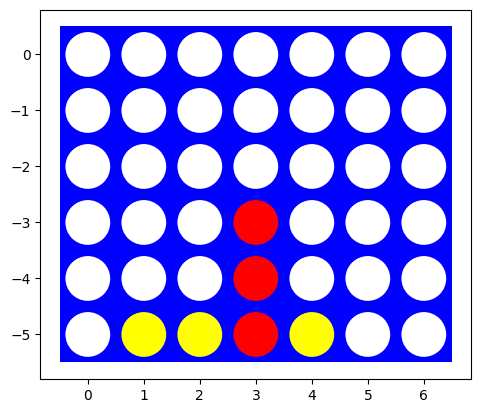

In [9]:
def visualize(board):
    plt.axes()
    rectangle=plt.Rectangle((-0.5,len(board)*-1+0.5),len(board[0]),len(board),fc='blue')
    circles=[]
    
    for i,row in enumerate(board):
        for j,val in enumerate(row):
            color='white' if val==0 else 'red' if val==1 else 'yellow'
            circles.append(plt.Circle((j,i*-1),0.4,fc=color))

    plt.gca().add_patch(rectangle)
    
    for circle in circles:
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()

board = [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0,-1,-1, 1,-1, 0, 0]]

visualize(board)

Implement helper functions for:
- A check for available actions in each state actions(state).
- The transition model result(state, player, action).
- Check for terminal states terminal(state).
- The utility function utility(state, player).

The player argument is used so your agent can play red or yellow. Make sure that all these functions work with boards of different sizes (number of columns and rows). You can follow the <a>tic-tac-toe example</a> from class.

In [10]:
def create_board(rows, cols):
    return np.zeros((rows, cols), dtype=int)

def is_valid_location(board, col):
    rows, _ = board.shape
    return board[rows - 1][col] == EMPTY

def get_next_open_row(board, col):
    rows, _ = board.shape
    for r in range(rows):
        if board[r][col] == EMPTY:
            return r
    return -1

def check_win(board, piece):
    rows, cols = board.shape

    for c in range(cols - (WIN_LENGTH - 1)):
        for r in range(rows):
            if all(board[r][c + i] == piece for i in range(WIN_LENGTH)):
                return True

    for c in range(cols):
        for r in range(rows - (WIN_LENGTH - 1)):
            if all(board[r + i][c] == piece for i in range(WIN_LENGTH)):
                return True

    for c in range(cols - (WIN_LENGTH - 1)):
        for r in range(rows - (WIN_LENGTH - 1)):
            if all(board[r + i][c + i] == piece for i in range(WIN_LENGTH)):
                return True

    for c in range(cols - (WIN_LENGTH - 1)):
        for r in range(WIN_LENGTH - 1, rows):
            if all(board[r - i][c + i] == piece for i in range(WIN_LENGTH)):
                return True
    return False


def actions(state):
    """
    Trả về một danh sách các hành động (cột) hợp lệ từ trạng thái hiện tại.
    """
    _, cols = state.shape
    possible_actions = []
    for col in range(cols):
        if is_valid_location(state, col):
            possible_actions.append(col)
    return possible_actions


def result(state, player, action):
    """
    Trả về một trạng thái bàn cờ MỚI sau khi 'player' thực hiện 'action'.
    Quan trọng: Hàm này không làm thay đổi 'state' gốc.
    
    Args:
        state (np.ndarray): Bàn cờ hiện tại.
        player (int): Quân cờ của người chơi (PLAYER_1_PIECE hoặc PLAYER_2_PIECE).
        action (int): Cột (col) để thả quân cờ.
        
    Returns:
        np.ndarray: Một bản sao của bàn cờ với nước đi mới.
    """
    row = get_next_open_row(state, action)
    new_state = state.copy()

    if row != -1:
        new_state[row][action] = player

    return new_state


def terminal(state):
    """
    Kiểm tra xem 'state' có phải là trạng thái kết thúc trò chơi không.
    (Có người thắng hoặc hòa).
    
    Returns:
        bool: True nếu game kết thúc, False nếu chưa.
    """
    return check_win(state, PLAYER_1_PIECE) or check_win(state, PLAYER_2_PIECE) or len(actions(state)) == 0


def utility(state, player):
    """
    Tính toán giá trị "tiện ích" (điểm số) của một trạng thái KẾT THÚC
    đối với 'player' được chỉ định.
    
    Giả định: Hàm này CHỈ được gọi khi terminal(state) là True.
    
    Args:
        state (np.ndarray): Trạng thái bàn cờ kết thúc.
        player (int): Người chơi mà chúng ta đang tính điểm (ví dụ: AI).
        
    Returns:
        int: 1 (thắng), -1 (thua), 0 (hòa).
    """
    if player == PLAYER_1_PIECE:
        opponent = PLAYER_2_PIECE
    else:
        opponent = PLAYER_1_PIECE

    if check_win(state, player):
        return 1
    elif check_win(state, opponent):
        return -1
    else:
        return 0

In [11]:
if __name__ == "__main__":
    ROWS = 5
    COLS = 6
    my_board = create_board(ROWS, COLS)

    print(f"--- Bàn cờ {ROWS}x{COLS} ban đầu ---")
    print(np.flip(my_board, 0))

    print(f"\nHành động khả dụng: {actions(my_board)}") # Sẽ là [0, 1, 2, 3, 4, 5]

    my_board = result(my_board, PLAYER_1_PIECE, 2) # P1 đi cột 2
    my_board = result(my_board, PLAYER_2_PIECE, 3) # P2 đi cột 3
    my_board = result(my_board, PLAYER_1_PIECE, 2) # P1 đi cột 2
    print("\n--- Bàn cờ sau vài nước đi ---")
    print(np.flip(my_board, 0))

    print(f"\nGame đã kết thúc chưa? {terminal(my_board)}") # False

    board_win_p1 = create_board(ROWS, COLS)
    board_win_p1[0][0] = PLAYER_1_PIECE
    board_win_p1[0][1] = PLAYER_1_PIECE
    board_win_p1[0][2] = PLAYER_1_PIECE
    board_win_p1[0][3] = PLAYER_1_PIECE

    print("\n--- Bàn cờ P1 thắng (ngang) ---")
    print(np.flip(board_win_p1, 0))

    print(f"Game đã kết thúc chưa? {terminal(board_win_p1)}")

    util_p1 = utility(board_win_p1, PLAYER_1_PIECE)
    print(f"Điểm tiện ích nếu tôi là P1: {util_p1}") # 1 (Thắng)

    util_p2 = utility(board_win_p1, PLAYER_2_PIECE)
    print(f"Điểm tiện ích nếu tôi là P2: {util_p2}") # -1 (Thua)

--- Bàn cờ 5x6 ban đầu ---
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]

Hành động khả dụng: [0, 1, 2, 3, 4, 5]

--- Bàn cờ sau vài nước đi ---
[[ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  1 -1  0  0]]

Game đã kết thúc chưa? False

--- Bàn cờ P1 thắng (ngang) ---
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 1 1 1 0 0]]
Game đã kết thúc chưa? True
Điểm tiện ích nếu tôi là P1: 1
Điểm tiện ích nếu tôi là P2: -1


Implement an agent that plays randomly. Make sure the agent function receives as the percept the board and returns a valid action. Use an agent function definition with the following signature (arguments):

`def random_player(board, player = 1): ...`

The argument player is used for agents that do not store what color they are playing. The value passed on by the environment should be 1 ot -1 for player red and yellow, respectively.

In [12]:
def random_player(board, player=1):
    """
    Tác nhân này chọn một hành động hợp lệ một cách ngẫu nhiên.
    
    Args:
        board (np.ndarray): Trạng thái bàn cờ hiện tại.
        player (int): Quân cờ của người chơi hiện tại (1 hoặc -1).
                      Lưu ý: Tác nhân này không sử dụng thông tin
                      này, nhưng vẫn nhận nó để tuân thủ chữ ký hàm.
                      
    Returns:
        int: Một chỉ số cột (hành động) hợp lệ được chọn ngẫu nhiên.
    """
    valid_actions = actions(board)

    if not valid_actions:
        return None

    return random.choice(valid_actions)

In [13]:
if __name__ == "__main__":
    ROWS = 6
    COLS = 7
    my_board = create_board(ROWS, COLS)

    for r in range(ROWS):
        my_board[r][0] = PLAYER_1_PIECE
        my_board[r][1] = PLAYER_2_PIECE
        my_board[r][2] = PLAYER_1_PIECE

    print("--- Bàn cờ hiện tại ---")
    print(np.flip(my_board, 0))

    print(f"\nCác hành động hợp lệ: {actions(my_board)}")

    move = random_player(my_board, PLAYER_1_PIECE)
    print(f"\nTác nhân ngẫu nhiên (chơi cho P1) đã chọn cột: {move}")

    move_2 = random_player(my_board, PLAYER_2_PIECE)
    print(f"Tác nhân ngẫu nhiên (chơi cho P2) đã chọn cột: {move_2}")

--- Bàn cờ hiện tại ---
[[ 1 -1  1  0  0  0  0]
 [ 1 -1  1  0  0  0  0]
 [ 1 -1  1  0  0  0  0]
 [ 1 -1  1  0  0  0  0]
 [ 1 -1  1  0  0  0  0]
 [ 1 -1  1  0  0  0  0]]

Các hành động hợp lệ: [3, 4, 5, 6]

Tác nhân ngẫu nhiên (chơi cho P1) đã chọn cột: 6
Tác nhân ngẫu nhiên (chơi cho P2) đã chọn cột: 5


Let two random agents play against each other 1000 times. Look at the <a>Experiments section for tic-tac-toe</a> to see how the environment uses the agent functions to play against each other.

### How often does each player win? Is the result expected?

In [14]:
def play_game(player1_func, player2_func, rows=ROWS, cols=COLS):
    board = create_board(rows, cols)
    current_player = PLAYER_1_PIECE  

    while not terminal(board):
        if current_player == PLAYER_1_PIECE:
            move = player1_func(board, PLAYER_1_PIECE)
        else:
            move = player2_func(board, PLAYER_2_PIECE)

        if move is None:
            break
            
        board = result(board, current_player, move)
        current_player = -current_player 

    if check_win(board, PLAYER_1_PIECE):
        return PLAYER_1_PIECE
    elif check_win(board, PLAYER_2_PIECE):
        return PLAYER_2_PIECE
    else:
        return EMPTY

In [15]:
if __name__ == "__main__":
    NUM_GAMES = 1000
    p1_wins = 0
    p2_wins = 0
    draws = 0

    print(f"Bắt đầu {NUM_GAMES} ván đấu giữa hai tác nhân ngẫu nhiên...")
    start_time = time.time()

    for i in range(NUM_GAMES):
        if (i + 1) % 100 == 0:
            print(f"  Đã chơi {i + 1}/{NUM_GAMES} ván...")

        winner = play_game(random_player, random_player)

        if winner == PLAYER_1_PIECE:
            p1_wins += 1
        elif winner == PLAYER_2_PIECE:
            p2_wins += 1
        else:
            draws += 1

    end_time = time.time()
    print(f"...Hoàn thành sau {end_time - start_time:.2f} giây.")

    print("\n--- KẾT QUẢ MÔ PHỎNG ---")
    print(f"Tổng số ván đấu: {NUM_GAMES}")
    print(f"Người chơi 1 (Đỏ) thắng:  {p1_wins} ván ({p1_wins/NUM_GAMES*100:.1f}%)")
    print(f"Người chơi 2 (Vàng) thắng: {p2_wins} ván ({p2_wins/NUM_GAMES*100:.1f}%)")
    print(f"Số ván hòa:               {draws} ván ({draws/NUM_GAMES*100:.1f}%)")

Bắt đầu 1000 ván đấu giữa hai tác nhân ngẫu nhiên...
  Đã chơi 100/1000 ván...
  Đã chơi 200/1000 ván...
  Đã chơi 300/1000 ván...
  Đã chơi 400/1000 ván...
  Đã chơi 500/1000 ván...
  Đã chơi 600/1000 ván...
  Đã chơi 700/1000 ván...
  Đã chơi 800/1000 ván...
  Đã chơi 900/1000 ván...
  Đã chơi 1000/1000 ván...
...Hoàn thành sau 4.85 giây.

--- KẾT QUẢ MÔ PHỎNG ---
Tổng số ván đấu: 1000
Người chơi 1 (Đỏ) thắng:  561 ván (56.1%)
Người chơi 2 (Vàng) thắng: 437 ván (43.7%)
Số ván hòa:               2 ván (0.2%)


## Task 3: Minimax Search with Alpha-Beta Pruning

### Implement the Search [20 points]

Implement minimax search starting from a given board for specifying the player.

Important Notes:
- You can use code from the tic-tac-toe example.
- Make sure that all your agent functions have a signature consistent with the random agent above and that it uses a class to store state information. This is essential to be able play against agents from other students later.
- The game tree for a  6×7  board is huge and optimal algorithms need to visit each or a large percentage of all nodes in the tree. You can experiment with smaller boards like a  4×4  board first.

In [16]:
class MinimaxAgent:
    """
    Lớp này triển khai tác nhân Minimax.
    Nó lưu trữ quân cờ (piece) và độ sâu tìm kiếm (search_depth)
    như là một phần của trạng thái nội tại của nó.
    """

    def __init__(self, piece, search_depth=4):
        """
        Khởi tạo tác nhân.
        
        Args:
            piece (int): Quân cờ của tác nhân này (1 hoặc -1).
            search_depth (int): Độ sâu tối đa mà thuật toán sẽ tìm kiếm.
        """
        self.piece = piece
        self.opponent_piece = -piece
        self.search_depth = search_depth

        self.SCORE_4_IN_ROW = 1000000
        self.SCORE_3_IN_ROW = 100
        self.SCORE_2_IN_ROW = 10
        self.SCORE_OPPONENT_3 = -80
        self.SCORE_OPPONENT_2 = -5


    def _evaluate_window(self, window, piece):
        """Hàm trợ giúp để chấm điểm một 'cửa sổ' 4 ô."""
        score = 0
        opp_piece = self.opponent_piece

        if window.count(piece) == 4:
            score += self.SCORE_4_IN_ROW
        elif window.count(piece) == 3 and window.count(EMPTY) == 1:
            score += self.SCORE_3_IN_ROW
        elif window.count(piece) == 2 and window.count(EMPTY) == 2:
            score += self.SCORE_2_IN_ROW

        if window.count(opp_piece) == 3 and window.count(EMPTY) == 1:
            score += self.SCORE_OPPONENT_3
        elif window.count(opp_piece) == 2 and window.count(EMPTY) == 2:
            score += self.SCORE_OPPONENT_2

        return score


    def _score_position(self, board, piece):
        """
        Hàm lượng giá (Heuristic). Chấm điểm toàn bộ bàn cờ dựa trên quân cờ 'piece' của người chơi hiện tại.
        """
        score = 0
        rows, cols = board.shape

        # Cột giữa
        center_array = list(board[:, cols // 2])
        center_count = center_array.count(piece)
        score += center_count * 3

        # Ngang
        for r in range(rows):
            row_array = list(board[r, :])
            for c in range(cols - (WIN_LENGTH - 1)):
                window = row_array[c : c + WIN_LENGTH]
                score += self._evaluate_window(window, piece)

        # Dọc
        for c in range(cols):
            col_array = list(board[:, c])
            for r in range(rows - (WIN_LENGTH - 1)):
                window = col_array[r : r + WIN_LENGTH]
                score += self._evaluate_window(window, piece)

        # Chéo chính (\)
        for r in range(WIN_LENGTH - 1, rows):
            for c in range(cols - (WIN_LENGTH - 1)):
                window = [board[r - i][c + i] for i in range(WIN_LENGTH)]
                score += self._evaluate_window(window, piece)

        # Chéo phụ (/)
        for r in range(rows - (WIN_LENGTH - 1)):
            for c in range(cols - (WIN_LENGTH - 1)):
                window = [board[r + i][c + i] for i in range(WIN_LENGTH)]
                score += self._evaluate_window(window, piece)

        return score


    def _minimax(self, board, depth, alpha, beta, is_maximizing_player):
        """
        Thuật toán Minimax đệ quy với cắt tỉa Alpha-Beta.
        """
        valid_actions_list = actions(board)

        is_terminal_node = terminal(board)
        if depth == 0 or is_terminal_node:
            if is_terminal_node:
                if check_win(board, self.piece):
                    return (None, self.SCORE_4_IN_ROW * 10)
                elif check_win(board, self.opponent_piece):
                    return (None, -self.SCORE_4_IN_ROW * 10)
                else: # Hòa
                    return (None, 0)
            else:
                return (None, self._score_position(board, self.piece))

        if is_maximizing_player:
            value = -math.inf
            column = random.choice(valid_actions_list)

            for col in valid_actions_list:
                new_board = result(board, self.piece, col)
                _col, new_score = self._minimax(new_board, depth - 1, alpha, beta, False)

                if new_score > value:
                    value = new_score
                    column = col
                alpha = max(alpha, value)
                if alpha >= beta:
                    break
            return column, value

        else:
            value = math.inf
            column = random.choice(valid_actions_list)

            for col in valid_actions_list:
                new_board = result(board, self.opponent_piece, col)
                _col, new_score = self._minimax(new_board, depth - 1, alpha, beta, True)

                if new_score < value:
                    value = new_score
                    column = col
                beta = min(beta, value)
                if alpha >= beta:
                    break # Cắt tỉa Alpha
            return column, value


    def find_move(self, board, player):
        """
        Đây là hàm có chữ ký nhất quán được yêu cầu.
        Nó hoạt động như "cổng vào" cho thuật toán minimax.
        
        Args:
            board (np.ndarray): Bàn cờ hiện tại.
            player (int): Quân cờ của người chơi hiện tại (phải khớp với self.piece).
        
        Returns:
            int: Cột tốt nhất được tìm thấy.
        """
        if player != self.piece:
            print("Lỗi: Tác nhân được gọi không đúng lượt!")
            return None # Lỗi

        best_col, score = self._minimax(
            board,
            self.search_depth,
            -math.inf,
            math.inf,
            True
        )

        print(f"Agent {self.piece} chọn cột {best_col} (Score: {score})")
        return best_col

In [17]:
if __name__ == "__main__":
    ROWS_TEST = 4
    COLS_TEST = 4
    WIN_LENGTH = 4

    # --- Thử nghiệm trên bàn cờ nhỏ (4x4) ---
    print("--- Bắt đầu thử nghiệm 4x4 (Độ sâu 6) ---")
    agent_p1_small = MinimaxAgent(piece=PLAYER_1_PIECE, search_depth=6)
    play_game(agent_p1_small.find_move, random_player, ROWS_TEST, COLS_TEST)


    # --- Thử nghiệm trên bàn cờ lớn (6x7) ---
    print("\n\n--- Bắt đầu ván đấu 6x7 (Minimax vs Random) ---")
    SEARCH_DEPTH_P1 = 5
    agent_p1 = MinimaxAgent(piece=PLAYER_1_PIECE, search_depth=SEARCH_DEPTH_P1)
    player2_agent_func = random_player

    start_time = time.time()
    winner = play_game(agent_p1.find_move, player2_agent_func)
    end_time = time.time()

    print(f"\n--- TRÒ CHƠI KẾT THÚC (sau {end_time - start_time:.2f}s) ---")
    if winner == PLAYER_1_PIECE:
        print(f"Người chiến thắng: MINIMAX (P1)")
    elif winner == PLAYER_2_PIECE:
        print(f"Người chiến thắng: RANDOM (P2)")
    else:
        print("Kết quả: HÒA")


    # --- Thử nghiệm Minimax (P2) vs Random (P1) ---
    print("\n\n--- Bắt đầu ván đấu 6x7 (Random vs Minimax) ---")
    SEARCH_DEPTH_P2 = 5
    agent_p2 = MinimaxAgent(piece=PLAYER_2_PIECE, search_depth=SEARCH_DEPTH_P2)

    start_time = time.time()
    winner = play_game(random_player, agent_p2.find_move)
    end_time = time.time()

    print(f"\n--- TRÒ CHƠI KẾT THÚC (sau {end_time - start_time:.2f}s) ---")
    if winner == PLAYER_1_PIECE:
        print(f"Người chiến thắng: RANDOM (P1)")
    elif winner == PLAYER_2_PIECE:
        print(f"Người chiến thắng: MINIMAX (P2)")
    else:
        print("Kết quả: HÒA")

--- Bắt đầu thử nghiệm 4x4 (Độ sâu 6) ---
Agent 1 chọn cột 2 (Score: 1)
Agent 1 chọn cột 2 (Score: 4)
Agent 1 chọn cột 1 (Score: 14)
Agent 1 chọn cột 2 (Score: 104)
Agent 1 chọn cột 2 (Score: 10000000)


--- Bắt đầu ván đấu 6x7 (Minimax vs Random) ---
Agent 1 chọn cột 3 (Score: 31)
Agent 1 chọn cột 3 (Score: 66)
Agent 1 chọn cột 5 (Score: 154)
Agent 1 chọn cột 4 (Score: 341)
Agent 1 chọn cột 0 (Score: 10000000)
Agent 1 chọn cột 0 (Score: 10000000)
Agent 1 chọn cột 0 (Score: 10000000)
Agent 1 chọn cột 3 (Score: 10000000)
Agent 1 chọn cột 0 (Score: 10000000)
Agent 1 chọn cột 1 (Score: 10000000)
Agent 1 chọn cột 1 (Score: 10000000)
Agent 1 chọn cột 1 (Score: 10000000)
Agent 1 chọn cột 1 (Score: 10000000)
Agent 1 chọn cột 2 (Score: 10000000)

--- TRÒ CHƠI KẾT THÚC (sau 5.57s) ---
Người chiến thắng: MINIMAX (P1)


--- Bắt đầu ván đấu 6x7 (Random vs Minimax) ---
Agent -1 chọn cột 2 (Score: 21)
Agent -1 chọn cột 3 (Score: 61)
Agent -1 chọn cột 2 (Score: 141)
Agent -1 chọn cột 3 (Score: 224)
A

### Experiment with some manually created boards (at least 5) to check if the agent spots winning opportunities.

In [18]:
def run_tests():
    """
    Chạy các thử nghiệm được xác định trước để kiểm tra logic của Minimax.
    """
    agent_P1 = MinimaxAgent(piece=PLAYER_1_PIECE, search_depth=4)
    
    P1 = PLAYER_1_PIECE
    P_OPP = PLAYER_2_PIECE
    test_cases = []

    # --- Test 1: Thắng Ngang (Horizontal Win) ---
    board_h = create_board(ROWS, COLS)
    board_h[0][0] = P1
    board_h[0][1] = P1
    board_h[0][2] = P1
    board_h[0][4] = P_OPP
    test_cases.append(("Test 1: Thắng Ngang", board_h, 3))

    # --- Test 2: Thắng Dọc (Vertical Win) ---
    board_v = create_board(ROWS, COLS)
    board_v[0][0] = P1
    board_v[1][0] = P1
    board_v[2][0] = P1
    board_v[0][1] = P_OPP
    test_cases.append(("Test 2: Thắng Dọc", board_v, 0))

    # --- Test 3: Thắng Chéo Chính (\) (Negative Diagonal Win) ---
    board_d2 = create_board(ROWS, COLS)
    board_d2[0][3] = P1
    board_d2[1][2] = P1
    board_d2[2][1] = P1
    board_d2[0][0] = P_OPP; board_d2[0][1] = P_OPP; board_d2[0][2] = P_OPP
    board_d2[1][0] = P_OPP; board_d2[1][1] = P_OPP
    board_d2[2][0] = P_OPP
    test_cases.append(("Test 4: Thắng Chéo (-)", board_d2, 0))

    # --- Test 4: Thắng Chéo Phụ (/) (Positive Diagonal Win) ---
    board_d1 = create_board(ROWS, COLS)
    board_d1[0][0] = P1
    board_d1[1][1] = P1
    board_d1[2][2] = P1
    board_d1[0][1] = P_OPP; board_d1[0][2] = P_OPP; board_d1[0][3] = P_OPP
    board_d1[1][2] = P_OPP; board_d1[1][3] = P_OPP
    board_d1[2][3] = P_OPP
    test_cases.append(("Test 3: Thắng Chéo (+)", board_d1, 3))

    # --- Test 5: Chặn Thắng Ngang (Block Horizontal Win) ---
    board_bh = create_board(ROWS, COLS)
    board_bh[0][0] = P_OPP
    board_bh[0][1] = P_OPP
    board_bh[0][2] = P_OPP
    board_bh[0][4] = P1
    test_cases.append(("Test 5: Chặn Thắng Ngang", board_bh, 3))

    board_bv = create_board(ROWS, COLS)
    board_bv[0][0] = P_OPP
    board_bv[1][0] = P_OPP
    board_bv[2][0] = P_OPP
    board_bv[0][1] = P1
    test_cases.append(("Test 6: Chặn Thắng Dọc", board_bv, 0))

    print("Bắt đầu thử nghiệm tác nhân Minimax...")
    print("="*40)

    passed_count = 0
    for name, board, expected_move in test_cases:
        print(f"Đang chạy {name}...")
        print("Bàn cờ thử nghiệm (lật ngược):")
        print(np.flip(board, 0))

        start_time = time.time()
        actual_move = agent_P1.find_move(board, PLAYER_1_PIECE)
        end_time = time.time()

        print(f"  Thời gian: {end_time - start_time:.4f}s")
        print(f"  Nước đi mong đợi: Cột {expected_move}")
        print(f"  Nước đi của AI:   Cột {actual_move}")

        if actual_move == expected_move:
            print(f"  Kết quả: PASSED (Đạt) ✅\n")
            passed_count += 1
        else:
            print(f"  Kết quả: FAILED (Trượt) ❌\n")
        print("-"*40)

    print(f"--- TỔNG KẾT THỬ NGHIỆM ---")
    print(f"Đã vượt qua: {passed_count}/{len(test_cases)} trường hợp.")
    if passed_count == len(test_cases):
        print("Tất cả các thử nghiệm cơ bản đã thành công! Tác nhân của bạn hoạt động tốt.")
    else:
        print("Một số thử nghiệm đã thất bại. Hãy kiểm tra lại logic heuristic hoặc minimax.")


if __name__ == "__main__":
    run_tests()

Bắt đầu thử nghiệm tác nhân Minimax...
Đang chạy Test 1: Thắng Ngang...
Bàn cờ thử nghiệm (lật ngược):
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 1  1  1  0 -1  0  0]]
Agent 1 chọn cột 3 (Score: 10000000)
  Thời gian: 0.2564s
  Nước đi mong đợi: Cột 3
  Nước đi của AI:   Cột 3
  Kết quả: PASSED (Đạt) ✅

----------------------------------------
Đang chạy Test 2: Thắng Dọc...
Bàn cờ thử nghiệm (lật ngược):
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0]
 [ 1 -1  0  0  0  0  0]]
Agent 1 chọn cột 0 (Score: 10000000)
  Thời gian: 0.0458s
  Nước đi mong đợi: Cột 0
  Nước đi của AI:   Cột 0
  Kết quả: PASSED (Đạt) ✅

----------------------------------------
Đang chạy Test 4: Thắng Chéo (-)...
Bàn cờ thử nghiệm (lật ngược):
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [-1  1  0  0  0  0  0]
 [-1 -1  1  0  0  0  0]
 [

### How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns/rows.
Explain why using this algorithm on a standard  6×7  board is not feasible.

In [19]:
def measure_move_time(rows, cols, search_depth):
    """
    Đo thời gian cho một nước đi ở giữa ván cờ (mid-game).
    """
    board = create_board(rows, cols)
    
    current_player = PLAYER_1_PIECE
    
    for _ in range(6):
        if terminal(board):
            break
        valid_moves = actions(board)
        if not valid_moves:
            break
        move = random.choice(valid_moves)
        board = result(board, current_player, move)
        current_player = -current_player

    agent = MinimaxAgent(piece=PLAYER_1_PIECE, search_depth=search_depth)

    print(f"\nĐang thử nghiệm: {rows}x{cols}, Độ sâu={search_depth}")
    print("Bàn cờ thử nghiệm (đã lật):")
    print(np.flip(board, 0))

    start_time = time.time()
    best_move = agent.find_move(board, PLAYER_1_PIECE)
    end_time = time.time()

    time_taken = end_time - start_time
    print(f"AI đã chọn cột: {best_move}")
    return time_taken

In [20]:
if __name__ == "__main__":
    FIXED_SEARCH_DEPTH = 5

    print("--- BẮT ĐẦU ĐO LƯỜNG THỜI GIAN (Độ sâu cố định = {FIXED_SEARCH_DEPTH}) ---")
    board_sizes = [
        (4, 4), # 4 cột
        (4, 5), # 5 cột
        (5, 5), # Thêm hàng
        (5, 6), # 6 cột
        (6, 6), # Thêm hàng
        (6, 7)  # 7 cột (Tiêu chuẩn)
    ]

    results = {}

    for rows, cols in board_sizes:
        ROWS = rows
        COLS = cols

        time_taken = measure_move_time(rows, cols, FIXED_SEARCH_DEPTH)
        results[f"{rows}x{cols}"] = time_taken
        print(f"⏱️ Thời gian thực hiện: {time_taken:.4f} giây")
        print("-" * 30)

    print("\n\n--- TỔNG KẾT KẾT QUẢ (Độ sâu = {FIXED_SEARCH_DEPTH}) ---")
    for size, t in results.items():
        print(f"Bàn cờ {size}: {t:.4f} giây")

--- BẮT ĐẦU ĐO LƯỜNG THỜI GIAN (Độ sâu cố định = {FIXED_SEARCH_DEPTH}) ---

Đang thử nghiệm: 4x4, Độ sâu=5
Bàn cờ thử nghiệm (đã lật):
[[-1  0  0  0]
 [ 1  0  0  0]
 [-1  0  0  0]
 [-1  0  1  1]]
Agent 1 chọn cột 1 (Score: 16)
AI đã chọn cột: 1
⏱️ Thời gian thực hiện: 0.0314 giây
------------------------------

Đang thử nghiệm: 4x5, Độ sâu=5
Bàn cờ thử nghiệm (đã lật):
[[ 0 -1  0  0  0]
 [ 0 -1  0  0  0]
 [ 0  1  0  1  0]
 [ 0  1  0 -1  0]]
Agent 1 chọn cột 0 (Score: 26)
AI đã chọn cột: 0
⏱️ Thời gian thực hiện: 0.0701 giây
------------------------------

Đang thử nghiệm: 5x5, Độ sâu=5
Bàn cờ thử nghiệm (đã lật):
[[ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  1]
 [-1 -1  1 -1  1]]
Agent 1 chọn cột 2 (Score: 116)
AI đã chọn cột: 2
⏱️ Thời gian thực hiện: 0.4624 giây
------------------------------

Đang thử nghiệm: 5x6, Độ sâu=5
Bàn cờ thử nghiệm (đã lật):
[[ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [-1  0  0  0  0  0]
 [-1  0  0  0  0  0]
 [-1  0  1  1  0  1]]
Agent

### Move ordering [5 points]

Starting the search with better moves will increase the efficiency of alpha-beta pruning. Describe and implement a simple move ordering strategy. Make a table that shows how the ordering strategies influence the time it takes to make a move?

In [21]:
# --- LỚP MINIMAX AGENT (ĐÃ CẬP NHẬT) ---
class MinimaxAgent:
    def __init__(self, piece, search_depth=4, use_move_ordering=False):
        self.piece = piece
        self.opponent_piece = -piece
        self.search_depth = search_depth

        # *** THAY ĐỔI MỚI ***
        self.use_move_ordering = use_move_ordering
        self.PREFERRED_MOVE_ORDER = [3, 2, 4, 1, 5, 0, 6]

        self.SCORE_4_IN_ROW = 1000000
        self.SCORE_3_IN_ROW = 100
        self.SCORE_2_IN_ROW = 10
        self.SCORE_OPPONENT_3 = -80
        self.SCORE_OPPONENT_2 = -5

    # Các hàm _evaluate_window và _score_position không thay đổi
    def _evaluate_window(self, window, piece):
        score = 0
        opp_piece = self.opponent_piece
        if window.count(piece) == 4: score += self.SCORE_4_IN_ROW
        elif window.count(piece) == 3 and window.count(EMPTY) == 1: score += self.SCORE_3_IN_ROW
        elif window.count(piece) == 2 and window.count(EMPTY) == 2: score += self.SCORE_2_IN_ROW
        if window.count(opp_piece) == 3 and window.count(EMPTY) == 1: score += self.SCORE_OPPONENT_3
        elif window.count(opp_piece) == 2 and window.count(EMPTY) == 2: score += self.SCORE_OPPONENT_2
        return score
    
    def _score_position(self, board, piece):
        score = 0
        rows, cols = board.shape
        center_array = list(board[:, cols // 2])
        center_count = center_array.count(piece)
        score += center_count * 3
        for r in range(rows):
            row_array = list(board[r, :])
            for c in range(cols - (WIN_LENGTH - 1)):
                window = row_array[c : c + WIN_LENGTH]
                score += self._evaluate_window(window, piece)
        for c in range(cols):
            col_array = list(board[:, c])
            for r in range(rows - (WIN_LENGTH - 1)):
                window = col_array[r : r + WIN_LENGTH]
                score += self._evaluate_window(window, piece)
        for r in range(rows - (WIN_LENGTH - 1)):
            for c in range(cols - (WIN_LENGTH - 1)):
                window = [board[r + i][c + i] for i in range(WIN_LENGTH)]
                score += self._evaluate_window(window, piece)
        for r in range(WIN_LENGTH - 1, rows):
            for c in range(cols - (WIN_LENGTH - 1)):
                window = [board[r - i][c + i] for i in range(WIN_LENGTH)]
                score += self._evaluate_window(window, piece)
        return score
    

    def _minimax(self, board, depth, alpha, beta, is_maximizing_player):
        valid_actions_list = actions(board)
        is_terminal_node = terminal(board)

        if depth == 0 or is_terminal_node:
            if is_terminal_node:
                if check_win(board, self.piece): return (None, self.SCORE_4_IN_ROW * 10)
                elif check_win(board, self.opponent_piece): return (None, -self.SCORE_4_IN_ROW * 10)
                else: return (None, 0)
            else: return (None, self._score_position(board, self.piece))

        # THAY ĐỔI MỚI: SẮP XẾP HÀNH ĐỘNG
        if self.use_move_ordering:
            sorted_actions = []
            for col in self.PREFERRED_MOVE_ORDER:
                if col in valid_actions_list:
                    sorted_actions.append(col)
        else:
            sorted_actions = valid_actions_list

        if is_maximizing_player:
            value = -math.inf
            column = sorted_actions[0]
            
            # THAY ĐỔI MỚI: Lặp qua 'sorted_actions'
            for col in sorted_actions:
                new_board = result(board, self.piece, col)
                _col, new_score = self._minimax(new_board, depth - 1, alpha, beta, False)
                
                if new_score > value:
                    value = new_score
                    column = col
                alpha = max(alpha, value)
                
                if alpha >= beta: break
            return column, value
        else:
            value = math.inf
            column = sorted_actions[0]
            
            # THAY ĐỔI MỚI: Lặp qua 'sorted_actions'
            for col in sorted_actions:
                new_board = result(board, self.opponent_piece, col)
                _col, new_score = self._minimax(new_board, depth - 1, alpha, beta, True)
                
                if new_score < value:
                    value = new_score
                    column = col
                beta = min(beta, value)
                
                if alpha >= beta: break
            return column, value

    def find_move(self, board, player):
        if player != self.piece:
            print("Lỗi: Tác nhân được gọi không đúng lượt!")
            return None
        best_col, score = self._minimax(board, self.search_depth, -math.inf, math.inf, True)
        return best_col


def measure_move_time(rows, cols, search_depth, use_ordering):
    """
    Đo thời gian cho một nước đi ở giữa ván cờ (mid-game).
    """
    board = create_board(rows, cols)
    # Tạo một trạng thái "giữa ván cờ"
    current_player = PLAYER_1_PIECE
    for _ in range(6): # Thêm 6 quân cờ
        valid_moves = actions(board)
        if not valid_moves: break
        move = random.choice(valid_moves)
        board = result(board, current_player, move)
        current_player = -current_player

    agent = MinimaxAgent(
        piece=PLAYER_1_PIECE,
        search_depth=search_depth,
        use_move_ordering=use_ordering
    )

    start_time = time.time()
    agent.find_move(board, PLAYER_1_PIECE)
    end_time = time.time()
    return end_time - start_time

In [22]:
if __name__ == "__main__":
    print("--- SO SÁNH HIỆU QUẢ SẮP XẾP NƯỚC ĐI ---")
    print("Đang chạy thử nghiệm... (việc này có thể mất vài phút, đặc biệt ở độ sâu 7)")
    ROWS = 6
    COLS = 7

    depths_to_test = [4, 5, 6, 7]
    results_table = []

    for depth in depths_to_test:
        print(f"\nĐang thử nghiệm Độ sâu = {depth}...")

        # 1. Không sắp xếp (Baseline)
        print("  Đang chạy: Không sắp xếp...")
        time_no_order = measure_move_time(ROWS, COLS, depth, use_ordering=False)

        # 2. Có sắp xếp (Center First)
        print("  Đang chạy: Sắp xếp (Center First)...")
        time_with_order = measure_move_time(ROWS, COLS, depth, use_ordering=True)

        improvement_pct = 0
        if time_no_order > 0: # Tránh chia cho 0
            improvement_pct = (time_no_order - time_with_order) / time_no_order * 100

        results_table.append((depth, time_no_order, time_with_order, improvement_pct))

    print("\n\n" + "="*90)
    print("--- BẢNG KẾT QUẢ TỔNG HỢP (Bàn cờ 6x7) ---")
    print("="*90)
    print("| Độ sâu | Thời gian (Không Sắp xếp) | Thời gian (Sắp xếp Center First) | Cải thiện (%) |")
    print("|:------:|:-------------------------:|:--------------------------------:|:-------------:|")
    for d, t_no, t_yes, imp in results_table:
        print(f"| {d:^6} | {t_no:^25.4f}s | {t_yes:^32.4f}s | {imp:^13.2f}% |")
    print("="*90)

--- SO SÁNH HIỆU QUẢ SẮP XẾP NƯỚC ĐI ---
Đang chạy thử nghiệm... (việc này có thể mất vài phút, đặc biệt ở độ sâu 7)

Đang thử nghiệm Độ sâu = 4...
  Đang chạy: Không sắp xếp...
  Đang chạy: Sắp xếp (Center First)...

Đang thử nghiệm Độ sâu = 5...
  Đang chạy: Không sắp xếp...
  Đang chạy: Sắp xếp (Center First)...

Đang thử nghiệm Độ sâu = 6...
  Đang chạy: Không sắp xếp...
  Đang chạy: Sắp xếp (Center First)...

Đang thử nghiệm Độ sâu = 7...
  Đang chạy: Không sắp xếp...
  Đang chạy: Sắp xếp (Center First)...


--- BẢNG KẾT QUẢ TỔNG HỢP (Bàn cờ 6x7) ---
| Độ sâu | Thời gian (Không Sắp xếp) | Thời gian (Sắp xếp Center First) | Cải thiện (%) |
|:------:|:-------------------------:|:--------------------------------:|:-------------:|
|   4    |          0.3227          s |              0.1521             s |     52.88    % |
|   5    |          0.7551          s |              1.0669             s |    -41.29    % |
|   6    |          1.2240          s |              0.7333             

### The first few moves [5 points]

Start with an empty board. This is the worst case scenario for minimax search since it needs solve all possible games that can be played (minus some pruning) before making the decision. What can you do?

In [23]:
class MinimaxAgent:
    def __init__(self, piece, search_depth=5, use_move_ordering=True):
        self.piece = piece
        self.opponent_piece = -piece
        self.search_depth = search_depth
        self.use_move_ordering = use_move_ordering
        self.PREFERRED_MOVE_ORDER = [3, 2, 4, 1, 5, 0, 6] # Cho bàn 6x7

        # HAY ĐỔI MỚI: SÁCH MỞ ĐẦU
        self.opening_book = {}
        self._init_opening_book()

        self.SCORE_4_IN_ROW = 1000000
        self.SCORE_3_IN_ROW = 100
        self.SCORE_2_IN_ROW = 10
        self.SCORE_OPPONENT_3 = -80
        self.SCORE_OPPONENT_2 = -5


    def _get_board_key(self, board):
        """
        Chuyển đổi numpy array thành một chuỗi hashable: [0, 0, -1, 1] -> "00-11"
        """
        return "".join(board.flatten().astype(str))


    def _init_opening_book(self):
        """
        Tính toán trước các nước đi tốt nhất.
        Đây là nơi bạn có thể chạy một tìm kiếm sâu (offline) và lưu kết quả.
        Hiện tại, chúng ta sẽ "hardcode" các nước đi tốt nhất đã biết.
        """

        # 1. Nước đi P1 (Bàn cờ trống): Nước đi thắng đã biết là cột giữa.
        board = create_board(ROWS, COLS)
        empty_key = self._get_board_key(board)
        center_col = COLS // 2
        self.opening_book[empty_key] = center_col

        # 2. Nước đi P2 (Đáp trả nước P1 đi vào giữa): Nước đi đáp trả tốt nhất của P2 cũng là cột giữa.
        board = result(board, PLAYER_1_PIECE, center_col)
        p1_center_key = self._get_board_key(board)
        self.opening_book[p1_center_key] = center_col


    def find_move(self, board, player):
        """
        Hàm chính để tìm nước đi.
        Sẽ kiểm tra Sách mở đầu TRƯỚC KHI chạy Minimax.
        """
        # HAY ĐỔI MỚI: KIỂM TRA SÁCH MỞ ĐẦU
        board_key = self._get_board_key(board)
        if board_key in self.opening_book:
            move = self.opening_book[board_key]
            return move

        best_col, score = self._minimax(
            board,
            self.search_depth,
            -math.inf,
            math.inf,
            True
        )
        return best_col

 
    def _minimax(self, board, depth, alpha, beta, is_maximizing_player):
        valid_actions_list = actions(board)
        is_terminal_node = terminal(board)

        if depth == 0 or is_terminal_node:
            if is_terminal_node:
                if check_win(board, self.piece): return (None, self.SCORE_4_IN_ROW * 10)
                elif check_win(board, self.opponent_piece): return (None, -self.SCORE_4_IN_ROW * 10)
                else: return (None, 0)
            else: return (None, self._score_position(board, self.piece))

        if self.use_move_ordering:
            sorted_actions = []
            for col in self.PREFERRED_MOVE_ORDER:
                if col in valid_actions_list:
                    sorted_actions.append(col)
        else:
            sorted_actions = valid_actions_list

        if is_maximizing_player:
            value = -math.inf
            column = sorted_actions[0]
            for col in sorted_actions:
                new_board = result(board, self.piece, col)
                _col, new_score = self._minimax(new_board, depth - 1, alpha, beta, False)
                if new_score > value:
                    value = new_score
                    column = col
                alpha = max(alpha, value)
                if alpha >= beta: break
            return column, value
        else:
            value = math.inf
            column = sorted_actions[0]
            for col in sorted_actions:
                new_board = result(board, self.opponent_piece, col)
                _col, new_score = self._minimax(new_board, depth - 1, alpha, beta, True)
                if new_score < value:
                    value = new_score
                    column = col
                beta = min(beta, value)
                if alpha >= beta: break
            return column, value

    # (Các hàm _evaluate_window và _score_position không thay đổi)
    def _evaluate_window(self, window, piece):
        score = 0
        opp_piece = self.opponent_piece
        if window.count(piece) == 4: score += self.SCORE_4_IN_ROW
        elif window.count(piece) == 3 and window.count(EMPTY) == 1: score += self.SCORE_3_IN_ROW
        elif window.count(piece) == 2 and window.count(EMPTY) == 2: score += self.SCORE_2_IN_ROW
        if window.count(opp_piece) == 3 and window.count(EMPTY) == 1: score += self.SCORE_OPPONENT_3
        elif window.count(opp_piece) == 2 and window.count(EMPTY) == 2: score += self.SCORE_OPPONENT_2
        return score
    
    def _score_position(self, board, piece):
        score = 0
        rows, cols = board.shape
        center_array = list(board[:, cols // 2])
        center_count = center_array.count(piece)
        score += center_count * 3
        for r in range(rows):
            row_array = list(board[r, :])
            for c in range(cols - (WIN_LENGTH - 1)):
                window = row_array[c : c + WIN_LENGTH]
                score += self._evaluate_window(window, piece)
        for c in range(cols):
            col_array = list(board[:, c])
            for r in range(rows - (WIN_LENGTH - 1)):
                window = col_array[r : r + WIN_LENGTH]
                score += self._evaluate_window(window, piece)
        for r in range(rows - (WIN_LENGTH - 1)):
            for c in range(cols - (WIN_LENGTH - 1)):
                window = [board[r + i][c + i] for i in range(WIN_LENGTH)]
                score += self._evaluate_window(window, piece)
        for r in range(WIN_LENGTH - 1, rows):
            for c in range(cols - (WIN_LENGTH - 1)):
                window = [board[r - i][c + i] for i in range(WIN_LENGTH)]
                score += self._evaluate_window(window, piece)
        return score

In [24]:
if __name__ == "__main__":
    agent_P1 = MinimaxAgent(piece=PLAYER_1_PIECE, search_depth=5)
    agent_P2 = MinimaxAgent(piece=PLAYER_2_PIECE, search_depth=5)

    print("--- THỬ NGHIỆM SÁCH MỞ ĐẦU ---")

    # --- Test 1: Bàn cờ trống (Lượt của P1) ---
    board = create_board(ROWS, COLS)
    print("\nTest 1: Bàn cờ trống (Lượt P1)")
    start_time = time.time()
    move = agent_P1.find_move(board, PLAYER_1_PIECE)
    end_time = time.time()

    print(f"  Nước đi: Cột {move} (Mong đợi: 3)")
    print(f"  Thời gian: {end_time - start_time:.6f}s (Phải gần như tức thời)")
    assert move == 3

    # --- Test 2: P1 đã đi vào giữa (Lượt của P2) ---
    board = result(board, PLAYER_1_PIECE, 3)
    print("\nTest 2: P1 đi giữa (Lượt P2)")
    print(np.flip(board, 0))
    start_time = time.time()
    move = agent_P2.find_move(board, PLAYER_2_PIECE)
    end_time = time.time()

    print(f"  Nước đi: Cột {move} (Mong đợi: 3)")
    print(f"  Thời gian: {end_time - start_time:.6f}s (Phải gần như tức thời)")
    assert move == 3

    # --- Test 3: Trạng thái giữa ván (Không có trong sách) ---
    board = result(board, PLAYER_2_PIECE, 3) # P2 đi
    board = result(board, PLAYER_1_PIECE, 2) # P1 đi
    board = result(board, PLAYER_2_PIECE, 4) # P2 đi
    print("\nTest 3: Trạng thái giữa ván (Lượt P1)")
    print(np.flip(board, 0))
    start_time = time.time()
    move = agent_P1.find_move(board, PLAYER_1_PIECE)
    end_time = time.time()

    print(f"  Nước đi: Cột {move}")
    print(f"  Thời gian: {end_time - start_time:.4f}s (Phải là thời gian chạy Minimax)")
    assert end_time - start_time > 0.01

--- THỬ NGHIỆM SÁCH MỞ ĐẦU ---

Test 1: Bàn cờ trống (Lượt P1)
  Nước đi: Cột 3 (Mong đợi: 3)
  Thời gian: 0.000000s (Phải gần như tức thời)

Test 2: P1 đi giữa (Lượt P2)
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]]
  Nước đi: Cột 3 (Mong đợi: 3)
  Thời gian: 0.000000s (Phải gần như tức thời)

Test 3: Trạng thái giữa ván (Lượt P1)
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0 -1  0  0  0]
 [ 0  0  1  1 -1  0  0]]
  Nước đi: Cột 3
  Thời gian: 0.9366s (Phải là thời gian chạy Minimax)


### Playtime [5 points]

Let the Minimax Search agent play a random agent on a  4×4  board. Analyze wins, losses and draws.

In [25]:
if __name__ == "__main__":
    ROWS = 4
    COLS = 4
    WIN_LENGTH = 4
    NUM_GAMES = 100 
    SEARCH_DEPTH = 8

    agent_p1 = MinimaxAgent(piece=PLAYER_1_PIECE, search_depth=SEARCH_DEPTH, use_move_ordering=True)
    player2_func = random_player

    p1_wins = 0
    p2_wins = 0
    draws = 0

    print(f"--- Bắt đầu {NUM_GAMES} ván đấu (Minimax vs Random) ---")
    print(f"Bàn cờ: {ROWS}x{COLS}, Độ sâu Minimax: {SEARCH_DEPTH}")
    start_time = time.time()

    for i in range(NUM_GAMES):
        if (i + 1) % 10 == 0:
            print(f"  Đã chơi {i + 1}/{NUM_GAMES} ván...")

        winner = play_game(agent_p1.find_move, player2_func, ROWS, COLS)

        if winner == PLAYER_1_PIECE:
            p1_wins += 1
        elif winner == PLAYER_2_PIECE:
            p2_wins += 1
        else:
            draws += 1

    end_time = time.time()
    print(f"...Hoàn thành sau {end_time - start_time:.2f} giây.")

    # In kết quả
    print("\n" + "="*50)
    print(f"--- KẾT QUẢ MÔ PHỎNG ({ROWS}x{COLS}) ---")
    print(f"Tác nhân 1 (Minimax, d={SEARCH_DEPTH}) vs Tác nhân 2 (Random)")
    print("="*50)
    print(f"Tổng số ván đấu: {NUM_GAMES}")
    print(f"Minimax (P1) thắng: {p1_wins} ván ({p1_wins/NUM_GAMES*100:.1f}%)")
    print(f"Random (P2) thắng:  {p2_wins} ván ({p2_wins/NUM_GAMES*100:.1f}%)")
    print(f"Số ván hòa:         {draws} ván ({draws/NUM_GAMES*100:.1f}%)")
    print("="*50)

--- Bắt đầu 100 ván đấu (Minimax vs Random) ---
Bàn cờ: 4x4, Độ sâu Minimax: 8
  Đã chơi 10/100 ván...
  Đã chơi 20/100 ván...
  Đã chơi 30/100 ván...
  Đã chơi 40/100 ván...
  Đã chơi 50/100 ván...
  Đã chơi 60/100 ván...
  Đã chơi 70/100 ván...
  Đã chơi 80/100 ván...
  Đã chơi 90/100 ván...
  Đã chơi 100/100 ván...
...Hoàn thành sau 41.54 giây.

--- KẾT QUẢ MÔ PHỎNG (4x4) ---
Tác nhân 1 (Minimax, d=8) vs Tác nhân 2 (Random)
Tổng số ván đấu: 100
Minimax (P1) thắng: 58 ván (58.0%)
Random (P2) thắng:  2 ván (2.0%)
Số ván hòa:         40 ván (40.0%)


## Task 4: Heuristic Alpha-Beta Tree Search

### Heuristic evaluation function [15 points]

Define and implement a heuristic evaluation function. Make sure that the heuristic value stays in the correct range.

In [26]:
ROWS = 6
COLS = 7
WIN_LENGTH = 4

EMPTY = 0
AI_PIECE = 1            # Giả sử AI là người chơi 1
OPPONENT_PIECE = -1     # Đối thủ là người chơi -1

# --- Định nghĩa điểm số Heuristic ---
# Quan trọng: Điểm thắng/thua phải lớn hơn nhiều
# so với bất kỳ tổ hợp điểm heuristic nào khác.
SCORE_WIN = 1000000     # Điểm cho một chiến thắng (4-hàng)
SCORE_3_IN_ROW = 100    # 3-hàng + 1 ô trống (mối đe dọa lớn)
SCORE_2_IN_ROW = 10     # 2-hàng + 2 ô trống
SCORE_CENTER_BONUS = 3  # Thưởng thêm cho mỗi quân ở cột giữa

# Điểm tiêu cực (chặn đối thủ) phải lớn hơn điểm tích cực (ví dụ: chặn 3-hàng của đối thủ quan trọng hơn việc tạo 2-hàng cho mình)
SCORE_BLOCK_3 = -80
SCORE_BLOCK_2 = -5


In [27]:
def _evaluate_window(window, piece):
    """
    Hàm trợ giúp để chấm điểm một 'cửa sổ' (list) 4 ô.
    Nó chấm điểm từ góc nhìn của 'piece' (ví dụ: AI_PIECE).
    """
    score = 0
    opp_piece = OPPONENT_PIECE if piece == AI_PIECE else AI_PIECE

    # 1. Chấm điểm tích cực (cho 'piece')
    my_count = window.count(piece)
    empty_count = window.count(EMPTY)

    if my_count == 4:
        score += SCORE_WIN
    elif my_count == 3 and empty_count == 1:
        score += SCORE_3_IN_ROW
    elif my_count == 2 and empty_count == 2:
        score += SCORE_2_IN_ROW

    # 2. Chấm điểm tiêu cực (chặn đối thủ)
    opp_count = window.count(opp_piece)

    if opp_count == 3 and empty_count == 1:
        score += SCORE_BLOCK_3
    elif opp_count == 2 and empty_count == 2:
        score += SCORE_BLOCK_2

    return score

def heuristic_evaluation_function(board, piece):
    """
    Hàm đánh giá heuristic chính.
    Chấm điểm toàn bộ bàn cờ từ góc nhìn của 'piece'.
    
    Args:
        board (np.ndarray): Trạng thái bàn cờ.
        piece (int): Quân cờ của người chơi cần đánh giá (1 hoặc -1).
        
    Returns:
        int: Tổng điểm heuristic cho bàn cờ.
    """
    score = 0
    rows, cols = board.shape

    # 1. Thưởng điểm cho cột giữa
    center_col_index = cols // 2
    center_array = list(board[:, center_col_index])
    center_count = center_array.count(piece)
    score += center_count * SCORE_CENTER_BONUS

    # 2. Chấm điểm theo hàng ngang
    for r in range(rows):
        row_array = list(board[r, :])
        for c in range(cols - (WIN_LENGTH - 1)):
            window = row_array[c : c + WIN_LENGTH]
            score += _evaluate_window(window, piece)

    # 3. Chấm điểm theo hàng dọc
    for c in range(cols):
        col_array = list(board[:, c])
        for r in range(rows - (WIN_LENGTH - 1)):
            window = col_array[r : r + WIN_LENGTH]
            score += _evaluate_window(window, piece)

    # 4. Chấm điểm theo đường chéo chính (\)
    for r in range(WIN_LENGTH - 1, rows):
        for c in range(cols - (WIN_LENGTH - 1)):
            window = [board[r - i][c + i] for i in range(WIN_LENGTH)]
            score += _evaluate_window(window, piece)

    # 5. Chấm điểm theo đường chéo phụ (/)
    for r in range(rows - (WIN_LENGTH - 1)):
        for c in range(cols - (WIN_LENGTH - 1)):
            window = [board[r + i][c + i] for i in range(WIN_LENGTH)]
            score += _evaluate_window(window, piece)

    return score

### Cutting Off Search [10 points]

Modify your minimax search with alpha-beta pruning to cut off search at a specified depth and use the heuristic evaluation function. Experiment with different cutoff values.

In [28]:
class MinimaxAgent:
    def __init__(self, piece, search_depth=4, use_move_ordering=True):
        self.piece = piece
        self.opponent_piece = -piece
        self.search_depth = search_depth

        self.use_move_ordering = use_move_ordering
        self.PREFERRED_MOVE_ORDER = [3, 2, 4, 1, 5, 0, 6]

        self.SCORE_4_IN_ROW = 1000000
        self.SCORE_3_IN_ROW = 100
        self.SCORE_2_IN_ROW = 10
        self.SCORE_OPPONENT_3 = -80
        self.SCORE_OPPONENT_2 = -5

    def _evaluate_window(self, window, piece):
        score = 0
        opp_piece = self.opponent_piece
        if window.count(piece) == 4: score += self.SCORE_4_IN_ROW
        elif window.count(piece) == 3 and window.count(EMPTY) == 1: score += self.SCORE_3_IN_ROW
        elif window.count(piece) == 2 and window.count(EMPTY) == 2: score += self.SCORE_2_IN_ROW
        if window.count(opp_piece) == 3 and window.count(EMPTY) == 1: score += self.SCORE_OPPONENT_3
        elif window.count(opp_piece) == 2 and window.count(EMPTY) == 2: score += self.SCORE_OPPONENT_2
        return score

    def _score_position(self, board, piece):
        score = 0
        rows, cols = board.shape
        center_array = list(board[:, cols // 2])
        center_count = center_array.count(piece)
        score += center_count * 3
        for r in range(rows):
            row_array = list(board[r, :])
            for c in range(cols - (WIN_LENGTH - 1)):
                window = row_array[c : c + WIN_LENGTH]
                score += self._evaluate_window(window, piece)
        for c in range(cols):
            col_array = list(board[:, c])
            for r in range(rows - (WIN_LENGTH - 1)):
                window = col_array[r : r + WIN_LENGTH]
                score += self._evaluate_window(window, piece)
        for r in range(rows - (WIN_LENGTH - 1)):
            for c in range(cols - (WIN_LENGTH - 1)):
                window = [board[r + i][c + i] for i in range(WIN_LENGTH)]
                score += self._evaluate_window(window, piece)
        for r in range(WIN_LENGTH - 1, rows):
            for c in range(cols - (WIN_LENGTH - 1)):
                window = [board[r - i][c + i] for i in range(WIN_LENGTH)]
                score += self._evaluate_window(window, piece)
        return score

    def _minimax(self, board, depth, alpha, beta, is_maximizing_player):
        valid_actions_list = actions(board)
        is_terminal_node = terminal(board)

        # --- ĐIỂM CẮT TÌM KIẾM ---
        # 1. Cắt vì đạt độ sâu 0 (depth == 0) -> Dùng Heuristic
        # 2. Cắt vì là trạng thái kết thúc (is_terminal_node) -> Dùng Utility
        if depth == 0 or is_terminal_node:
            if is_terminal_node:
                if check_win(board, self.piece):
                    return (None, self.SCORE_4_IN_ROW * 10)
                elif check_win(board, self.opponent_piece):
                    return (None, -self.SCORE_4_IN_ROW * 10)
                else:
                    return (None, 0)
            else: 
                return (None, self._score_position(board, self.piece))

        if self.use_move_ordering:
            sorted_actions = []
            for col in self.PREFERRED_MOVE_ORDER:
                if col in valid_actions_list:
                    sorted_actions.append(col)
        else:
            sorted_actions = valid_actions_list

        if is_maximizing_player:
            value = -math.inf
            column = sorted_actions[0]
            for col in sorted_actions:
                new_board = result(board, self.piece, col)
                _col, new_score = self._minimax(new_board, depth - 1, alpha, beta, False)
                if new_score > value:
                    value = new_score
                    column = col
                alpha = max(alpha, value)
                if alpha >= beta:
                    break
            return column, value
        else:
            value = math.inf
            column = sorted_actions[0]
            for col in sorted_actions:
                new_board = result(board, self.opponent_piece, col)
                _col, new_score = self._minimax(new_board, depth - 1, alpha, beta, True)
                if new_score < value:
                    value = new_score
                    column = col
                beta = min(beta, value)
                if alpha >= beta:
                    break
            return column, value

    def find_move(self, board, player):
        """Hàm chính để tìm nước đi."""
        if player != self.piece: return None
        best_col, score = self._minimax(
            board,
            self.search_depth, # <--- Giá trị cắt
            -math.inf,
            math.inf,
            True
        )

        print(f"  [Độ sâu {self.search_depth}] Đã chọn: Cột {best_col} (Score: {score:.0f})")
        return best_col

In [29]:
if __name__ == "__main__":
    test_board = create_board(ROWS, COLS)
    test_board[0][3] = PLAYER_1_PIECE
    test_board[0][2] = PLAYER_2_PIECE
    test_board[1][3] = PLAYER_1_PIECE
    test_board[1][2] = PLAYER_2_PIECE
    test_board[0][4] = PLAYER_1_PIECE
    test_board[0][5] = PLAYER_2_PIECE

    print("--- Thử nghiệm với các giá trị cắt (Độ sâu) khác nhau ---")
    print("Bàn cờ thử nghiệm (lượt của P1 - AI):")
    print(np.flip(test_board, 0))
    print("="*40)

    depth_values = [1, 2, 3, 4, 5, 6]
    results = {}

    for depth in depth_values:
        agent = MinimaxAgent(
            piece=PLAYER_1_PIECE,
            search_depth=depth,
            use_move_ordering=True
        )

        print(f"Đang chạy thử nghiệm với Độ sâu cắt = {depth}...")

        start_time = time.time()
        move = agent.find_move(test_board, PLAYER_1_PIECE)
        end_time = time.time()

        time_taken = end_time - start_time
        results[depth] = (move, time_taken)
        print(f"  -> Thời gian: {time_taken:.4f} giây\n")

    print("\n" + "="*53)
    print("--- BẢNG TỔNG KẾT ---")
    print("| Độ sâu (Cắt) | Nước đi đã chọn | Thời gian (giây) |")
    print("|:------------:|:---------------:|:----------------:|")
    for depth, (move, t) in results.items():
        print(f"| {depth:^12} | {move:^15} | {t:^16.4f} |")
    print("="*53)

--- Thử nghiệm với các giá trị cắt (Độ sâu) khác nhau ---
Bàn cờ thử nghiệm (lượt của P1 - AI):
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0 -1  1  0  0  0]
 [ 0  0 -1  1  1 -1  0]]
Đang chạy thử nghiệm với Độ sâu cắt = 1...
  [Độ sâu 1] Đã chọn: Cột 2 (Score: 126)
  -> Thời gian: 0.0000 giây

Đang chạy thử nghiệm với Độ sâu cắt = 2...
  [Độ sâu 2] Đã chọn: Cột 2 (Score: 101)
  -> Thời gian: 0.0157 giây

Đang chạy thử nghiệm với Độ sâu cắt = 3...
  [Độ sâu 3] Đã chọn: Cột 3 (Score: 149)
  -> Thời gian: 0.0163 giây

Đang chạy thử nghiệm với Độ sâu cắt = 4...
  [Độ sâu 4] Đã chọn: Cột 3 (Score: 134)
  -> Thời gian: 0.0489 giây

Đang chạy thử nghiệm với Độ sâu cắt = 5...
  [Độ sâu 5] Đã chọn: Cột 2 (Score: 171)
  -> Thời gian: 0.2540 giây

Đang chạy thử nghiệm với Độ sâu cắt = 6...
  [Độ sâu 6] Đã chọn: Cột 3 (Score: 134)
  -> Thời gian: 0.3912 giây


--- BẢNG TỔNG KẾT ---
| Độ sâu (Cắt) | Nước đi đã chọn | Thời gian (giây) |
|:--

### Experiment with the same manually created boards as above to check if the agent spots wining opportunities.

In [30]:
class MinimaxAgent:
    def __init__(self, piece, search_depth=4, use_move_ordering=True):
        self.piece = piece
        self.opponent_piece = -piece
        self.search_depth = search_depth
        self.use_move_ordering = use_move_ordering
        self.PREFERRED_MOVE_ORDER = [3, 2, 4, 1, 5, 0, 6]

        # (Điểm số Heuristic)
        self.SCORE_4_IN_ROW = 1000000
        self.SCORE_3_IN_ROW = 100
        self.SCORE_2_IN_ROW = 10
        self.SCORE_OPPONENT_3 = -80
        self.SCORE_OPPONENT_2 = -5
        self.SCORE_CENTER_BONUS = 3

    # --- HÀM HEURISTIC ---
    def _evaluate_window(self, window, piece):
        score = 0
        opp_piece = self.opponent_piece
        if window.count(piece) == 4: score += self.SCORE_4_IN_ROW
        elif window.count(piece) == 3 and window.count(EMPTY) == 1: score += self.SCORE_3_IN_ROW
        elif window.count(piece) == 2 and window.count(EMPTY) == 2: score += self.SCORE_2_IN_ROW
        if window.count(opp_piece) == 3 and window.count(EMPTY) == 1: score += self.SCORE_OPPONENT_3
        elif window.count(opp_piece) == 2 and window.count(EMPTY) == 2: score += self.SCORE_OPPONENT_2
        return score

    def _score_position(self, board, piece):
        score = 0
        rows, cols = board.shape
        center_array = list(board[:, cols // 2])
        center_count = center_array.count(piece)
        score += center_count * self.SCORE_CENTER_BONUS

        for r in range(rows):
            row_array = list(board[r, :])
            for c in range(cols - (WIN_LENGTH - 1)):
                window = row_array[c : c + WIN_LENGTH]
                score += self._evaluate_window(window, piece)
        for c in range(cols):
            col_array = list(board[:, c])
            for r in range(rows - (WIN_LENGTH - 1)):
                window = col_array[r : r + WIN_LENGTH]
                score += self._evaluate_window(window, piece)
        for r in range(rows - (WIN_LENGTH - 1)):
            for c in range(cols - (WIN_LENGTH - 1)):
                window = [board[r + i][c + i] for i in range(WIN_LENGTH)]
                score += self._evaluate_window(window, piece)
        for r in range(WIN_LENGTH - 1, rows):
            for c in range(cols - (WIN_LENGTH - 1)):
                window = [board[r - i][c + i] for i in range(WIN_LENGTH)]
                score += self._evaluate_window(window, piece)
        return score

    # --- HÀM MINIMAX ---
    def _minimax(self, board, depth, alpha, beta, is_maximizing_player):
        valid_actions_list = actions(board)
        is_terminal_node = terminal(board)

        if depth == 0 or is_terminal_node:
            if is_terminal_node:
                if check_win(board, self.piece): return (None, self.SCORE_4_IN_ROW * 10)
                elif check_win(board, self.opponent_piece): return (None, -self.SCORE_4_IN_ROW * 10)
                else: return (None, 0)
            else: # Đã đạt độ sâu 0
                return (None, self._score_position(board, self.piece))

        if self.use_move_ordering:
            sorted_actions = []
            for col in self.PREFERRED_MOVE_ORDER:
                if col in valid_actions_list:
                    sorted_actions.append(col)
        else:
            sorted_actions = valid_actions_list

        if is_maximizing_player:
            value = -math.inf
            column = sorted_actions[0]
            for col in sorted_actions:
                new_board = result(board, self.piece, col)
                _col, new_score = self._minimax(new_board, depth - 1, alpha, beta, False)
                if new_score > value:
                    value = new_score
                    column = col
                alpha = max(alpha, value)
                if alpha >= beta: break
            return column, value
        else:
            value = math.inf
            column = sorted_actions[0]
            for col in sorted_actions:
                new_board = result(board, self.opponent_piece, col)
                _col, new_score = self._minimax(new_board, depth - 1, alpha, beta, True)
                if new_score < value:
                    value = new_score
                    column = col
                beta = min(beta, value)
                if alpha >= beta: break
            return column, value

    def find_move(self, board, player):
        if player != self.piece: return None
        best_col, score = self._minimax(board, self.search_depth, -math.inf, math.inf, True)
        return best_col


# --- HÀM THỬ NGHIỆM HEURISTIC MỚI ---
def run_heuristic_tests():
    """
    Chạy các thử nghiệm để kiểm tra logic của hàm heuristic.
    Chúng ta dùng độ sâu 3-4: đủ sâu để thấy mối đe dọa,
    nhưng đủ nông để phải dựa vào heuristic.
    """
    P1 = PLAYER_1_PIECE
    P_OPP = PLAYER_2_PIECE

    agent_P1 = MinimaxAgent(piece=P1, search_depth=4)
    test_cases = []

    # Test 1: Ưu tiên tạo 3-hàng hơn 2-hàng (Điểm +100 > +10) ---
    board1 = create_board(ROWS, COLS)
    board1[0][0] = P1; board1[0][1] = P1
    board1[1][4] = P1             
    board1[0][4] = P_OPP            
    test_cases.append(("Test 1: Ưu tiên 3-hàng hơn 2-hàng", board1, 2))

    # Test 2: Ưu tiên chặn 3-hàng hơn là tạo 3-hàng (Ngăn chặn -1000000 > ghi điểm +100)
    board2 = create_board(ROWS, COLS)
    board2[0][0] = P_OPP; board2[0][1] = P_OPP; board2[0][2] = P_OPP
    board2[1][4] = P1; board2[1][5] = P1              
    test_cases.append(("Test 2: Phải chặn 3-hàng của đối thủ", board2, 3))

    # Test 3: Ưu tiên tạo 3-hàng hơn là chặn 2-hàng (Điểm +100 > -5)v---
    board3 = create_board(ROWS, COLS)
    board3[0][0] = P_OPP; board3[0][1] = P_OPP # Đe dọa 2-hàng ở cột 2
    board3[1][4] = P1; board3[1][5] = P1      # Cơ hội 3-hàng ở cột 6
    test_cases.append(("Test 3: Ưu tiên 3-hàng (tấn công) hơn chặn 2-hàng", board3, 6))

    # Test 4: Ưu tiên 3-hàng (chéo) hơn 2-hàng (ngang) ---
    board4 = create_board(ROWS, COLS)
    board4[0][0] = P1; board4[1][1] = P1     
    board4[0][1] = P_OPP; board4[0][2] = P_OPP 
    board4[3][4] = P1                    
    board4[0][5] = P_OPP
    test_cases.append(("Test 4: Ưu tiên 3-hàng (chéo) hơn 2-hàng (ngang)", board4, 2))


    print("Bắt đầu thử nghiệm Hàm Heuristic (Độ sâu=4)...")
    print("="*40)

    passed_count = 0
    for name, board, expected_move in test_cases:
        print(f"Đang chạy {name}...")
        print("Bàn cờ thử nghiệm (lật ngược):")
        print(np.flip(board, 0))

        start_time = time.time()
        actual_move = agent_P1.find_move(board, PLAYER_1_PIECE)
        end_time = time.time()

        print(f"  Thời gian: {end_time - start_time:.4f}s")
        print(f"  Nước đi mong đợi: Cột {expected_move}")
        print(f"  Nước đi của AI:   Cột {actual_move}")

        if actual_move == expected_move:
            print(f"  Kết quả: PASSED (Đạt) ✅\n")
            passed_count += 1
        else:
            print(f"  Kết quả: FAILED (Trượt) ❌\n")
        print("-"*40)

    print(f"--- TỔNG KẾT THỬ NGHIỆM ---")
    print(f"Đã vượt qua: {passed_count}/{len(test_cases)} trường hợp.")


if __name__ == "__main__":
    run_heuristic_tests()

Bắt đầu thử nghiệm Hàm Heuristic (Độ sâu=4)...
Đang chạy Test 1: Ưu tiên 3-hàng hơn 2-hàng...
Bàn cờ thử nghiệm (lật ngược):
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 1  1  0  0 -1  0  0]]
  Thời gian: 0.0468s
  Nước đi mong đợi: Cột 2
  Nước đi của AI:   Cột 3
  Kết quả: FAILED (Trượt) ❌

----------------------------------------
Đang chạy Test 2: Phải chặn 3-hàng của đối thủ...
Bàn cờ thử nghiệm (lật ngược):
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  1  1  0]
 [-1 -1 -1  0  0  0  0]]
  Thời gian: 0.0313s
  Nước đi mong đợi: Cột 3
  Nước đi của AI:   Cột 3
  Kết quả: PASSED (Đạt) ✅

----------------------------------------
Đang chạy Test 3: Ưu tiên 3-hàng (tấn công) hơn chặn 2-hàng...
Bàn cờ thử nghiệm (lật ngược):
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  1  1  0]
 [-1 -

### How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [31]:
def measure_move_time(rows, cols, search_depth):
    """
    Đo thời gian cho một nước đi ở giữa ván cờ (mid-game).
    """
    board = create_board(rows, cols)
    current_player = PLAYER_1_PIECE
    
    for _ in range(4):
        valid_moves = actions(board)
        if not valid_moves: break
        move = random.choice(valid_moves)
        board = result(board, current_player, move)
        current_player = -current_player

    agent = MinimaxAgent(piece=PLAYER_1_PIECE, search_depth=search_depth, use_move_ordering=True)

    print(f"\nĐang thử nghiệm: {rows}x{cols}, Độ sâu={search_depth}")
    # print(np.flip(board, 0)) # Bỏ in để chạy nhanh hơn

    start_time = time.time()
    agent.find_move(board, PLAYER_1_PIECE)
    end_time = time.time()

    return end_time - start_time

In [32]:
if __name__ == "__main__":
    FIXED_ROWS = 6
    FIXED_SEARCH_DEPTH = 6

    print("--- BẮT ĐẦU ĐO LƯỜNG THỜI GIAN (Tăng số cột) ---")
    print(f"Số hàng cố định = {FIXED_ROWS}")
    print(f"Độ sâu tìm kiếm cố định = {FIXED_SEARCH_DEPTH}")

    # Danh sách số cột để thử
    column_counts = [4, 5, 6, 7]

    results = {}

    for cols in column_counts:
        time_taken = measure_move_time(FIXED_ROWS, cols, FIXED_SEARCH_DEPTH)
        board_size = f"{FIXED_ROWS}x{cols}"
        results[board_size] = time_taken
        print(f"⏱️  Kích thước {board_size}: {time_taken:.4f} giây")
        print("-" * 30)

    print("\n\n" + "="*50)
    print("--- BẢNG TỔNG KẾT ---")
    print("| Kích thước Bàn cờ | Yếu tố rẽ nhánh (b) | Thời gian (giây) |")
    print("|:-----------------:|:------------------:|:----------------:|")
    
    for board_size, t in results.items():
        cols = int(board_size.split('x')[1])
        print(f"| {board_size:^17} | {cols:^18} | {t:^16.4f} |")
    print("="*50)

--- BẮT ĐẦU ĐO LƯỜNG THỜI GIAN (Tăng số cột) ---
Số hàng cố định = 6
Độ sâu tìm kiếm cố định = 6

Đang thử nghiệm: 6x4, Độ sâu=6
⏱️  Kích thước 6x4: 0.0840 giây
------------------------------

Đang thử nghiệm: 6x5, Độ sâu=6
⏱️  Kích thước 6x5: 0.3255 giây
------------------------------

Đang thử nghiệm: 6x6, Độ sâu=6
⏱️  Kích thước 6x6: 0.7971 giây
------------------------------

Đang thử nghiệm: 6x7, Độ sâu=6
⏱️  Kích thước 6x7: 0.7955 giây
------------------------------


--- BẢNG TỔNG KẾT ---
| Kích thước Bàn cờ | Yếu tố rẽ nhánh (b) | Thời gian (giây) |
|:-----------------:|:------------------:|:----------------:|
|        6x4        |         4          |      0.0840      |
|        6x5        |         5          |      0.3255      |
|        6x6        |         6          |      0.7971      |
|        6x7        |         7          |      0.7955      |


### Playtime [5 points]

Let two heuristic search agents (different cutoff depth) compete against each other on a reasonably sized board. Since there is no randomness, you only need to let them play once.

In [33]:
def play_game(player1_func, player2_func, rows, cols):
    board = create_board(rows, cols)
    print("--- TRÒ CHƠI BẮT ĐẦU ---")
    print(np.flip(board, 0))
    print("-" * 20)

    current_player = PLAYER_1_PIECE

    while not terminal(board):
        if current_player == PLAYER_1_PIECE:
            move = player1_func(board, PLAYER_1_PIECE)
        else:
            move = player2_func(board, PLAYER_2_PIECE)

        if move is None or not is_valid_location(board, move):
            print(f"Tác nhân P{current_player} đưa ra nước đi không hợp lệ. Đối thủ thắng.")
            return -current_player

        board = result(board, current_player, move)

        print(f"\nBàn cờ sau lượt của P{current_player}:")
        print(np.flip(board, 0))
        print("-" * 20)

        current_player = -current_player

    if check_win(board, PLAYER_1_PIECE):
        return PLAYER_1_PIECE
    elif check_win(board, PLAYER_2_PIECE):
        return PLAYER_2_PIECE
    else:
        return EMPTY

In [34]:
if __name__ == "__main__":
    ROWS = 6
    COLS = 7

    DEPTH_P1 = 5
    DEPTH_P2 = 3

    agent_p1 = MinimaxAgent(piece=PLAYER_1_PIECE, search_depth=DEPTH_P1, use_move_ordering=True)

    agent_p2 = MinimaxAgent(piece=PLAYER_2_PIECE, search_depth=DEPTH_P2, use_move_ordering=True)

    print(f"Bắt đầu ván đấu trên bàn {ROWS}x{COLS}:")
    print(f"P1: Minimax (Độ sâu = {DEPTH_P1})")
    print(f"P2: Minimax (Độ sâu = {DEPTH_P2})")

    start_game_time = time.time()
    winner = play_game(agent_p1.find_move, agent_p2.find_move, ROWS, COLS)
    end_game_time = time.time()

    print("\n" + "="*40)
    print("--- KẾT QUẢ TRẬN ĐẤU ---")
    if winner == PLAYER_1_PIECE:
        print(f"🏆 Người chiến thắng: P1 (Minimax Sâu {DEPTH_P1})")
    elif winner == PLAYER_2_PIECE:
        print(f"🏆 Người chiến thắng: P2 (Minimax Sâu {DEPTH_P2})")
    else:
        print("Kết quả: HÒA")

    print(f"Tổng thời gian chơi: {end_game_time - start_game_time:.2f} giây.")
    print("="*40)

Bắt đầu ván đấu trên bàn 6x7:
P1: Minimax (Độ sâu = 5)
P2: Minimax (Độ sâu = 3)
--- TRÒ CHƠI BẮT ĐẦU ---
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
--------------------

Bàn cờ sau lượt của P1:
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]]
--------------------

Bàn cờ sau lượt của P-1:
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0 -1  0  0  0]
 [ 0  0  0  1  0  0  0]]
--------------------

Bàn cờ sau lượt của P1:
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0 -1  0  0  0]
 [ 0  0  0  1  0  0  0]]
--------------------

Bàn cờ sau lượt của P-1:
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0 -1  0  0  0]
 [ 0  0 -1  1  0  0  0]]
--------------------

Bàn cờ sau lượt của P1:
[[ 0  0  0  0  0  0  0

## Graduate student advanced task: Pure Monte Carlo Search and Best First Move [10 point]

### Pure Monte Carlo Search

Implement Pure Monte Carlo Search and investigate how this search performs on the test boards that you have used above.

In [35]:
class PureMonteCarloAgent:
    def __init__(self, piece, num_simulations=100):
        """
        Khởi tạo tác nhân.
        
        Args:
            piece (int): Quân cờ của tác nhân (1 hoặc -1).
            num_simulations (int): Số lần "chơi thử" (rollout) 
                                   cho MỖI nước đi hợp lệ.
        """
        self.piece = piece
        self.opponent_piece = -piece
        self.num_simulations = num_simulations


    def _rollout(self, board, player_turn):
        """
        Chạy một ván cờ ngẫu nhiên (rollout) từ trạng thái hiện tại
        cho đến khi kết thúc.
        
        Args:
            board (np.ndarray): Trạng thái bắt đầu mô phỏng.
            player_turn (int): Lượt của người chơi tiếp theo.
            
        Returns:
            int: Người chiến thắng (1, -1, hoặc 0 cho hòa).
        """
        sim_board = board.copy()
        current_player = player_turn

        while not terminal(sim_board):
            valid_moves = actions(sim_board)
            if not valid_moves:
                break
            move = random.choice(valid_moves)

            sim_board = result(sim_board, current_player, move)
            current_player = -current_player

        if check_win(sim_board, self.piece):
            return self.piece
        elif check_win(sim_board, self.opponent_piece):
            return self.opponent_piece
        else:
            return EMPTY # Hòa


    def find_move(self, board, player):
        """
        Tìm nước đi tốt nhất bằng cách mô phỏng nhiều ván cờ.
        """
        if player != self.piece:
            print("Lỗi: Tác nhân được gọi không đúng lượt!")
            return None

        valid_actions = actions(board)
        if not valid_actions:
            return None

        scores = {}

        print(f"  Agent (MC, N={self.num_simulations}) đang suy nghĩ...")

        for action in valid_actions:
            wins = 0
            draws = 0

            # 1. Lấy trạng thái bàn cờ sau khi thực hiện hành động
            next_state = result(board, self.piece, action)

            # 2. KIỂM TRA THẮNG NGAY LẬP TỨC.
            if check_win(next_state, self.piece):
                scores[action] = 1.0 # 100% thắng
                print(f"  -> Đã tìm thấy nước đi thắng ngay: Cột {action}")
                return action

            # 3. KIỂM TRA HÒA NGAY LẬP TỨC
            if terminal(next_state):
                scores[action] = 0.5 # Hòa
                continue

            # 4. CHẠY MÔ PHỎNG (ROLLOUTS)
            for _ in range(self.num_simulations):
                winner = self._rollout(next_state, self.opponent_piece)

                if winner == self.piece:
                    wins += 1
                elif winner == EMPTY:
                    draws += 1

            # Tính điểm = (thắng + 0.5 * hòa) / tổng
            scores[action] = (wins + 0.5 * draws) / self.num_simulations

        best_move = max(scores, key=scores.get)
        print(f"  -> Đã chọn cột {best_move} (Tỷ lệ thắng: {scores[best_move]:.2f})")
        return best_move


def run_monte_carlo_tests():
    """
    Chạy các thử nghiệm để kiểm tra logic của Pure Monte Carlo.
    """
    P1 = PLAYER_1_PIECE
    P_OPP = PLAYER_2_PIECE

    agent_MC = PureMonteCarloAgent(piece=P1, num_simulations=200)

    test_cases = []

    # --- Test 1-4: Các trường hợp THẮNG NGAY LẬP TỨC ---
    # Mong đợi: PASSED (Đạt), vì logic kiểm tra thắng ngay sẽ bắt được.
    board_h = create_board(ROWS, COLS); board_h[0][0]=P1; board_h[0][1]=P1; board_h[0][2]=P1
    test_cases.append(("Test 1: Thắng Ngang (MC)", board_h, 3))

    board_v = create_board(ROWS, COLS); board_v[0][0]=P1; board_v[1][0]=P1; board_v[2][0]=P1
    test_cases.append(("Test 2: Thắng Dọc (MC)", board_v, 0))


    # --- Test 5-6: Các trường hợp CHẶN NGAY LẬP TỨC ---
    # Mong đợi: FAILED (Trượt), như giải thích ở dưới.
    board_bh = create_board(ROWS, COLS); board_bh[0][0]=P_OPP; board_bh[0][1]=P_OPP; board_bh[0][2]=P_OPP
    test_cases.append(("Test 5: Chặn Thắng Ngang (MC)", board_bh, 3))

    board_bv = create_board(ROWS, COLS); board_bv[0][0]=P_OPP; board_bv[1][0]=P_OPP; board_bv[2][0]=P_OPP
    test_cases.append(("Test 6: Chặn Thắng Dọc (MC)", board_bv, 0))


    print("Bắt đầu thử nghiệm tác nhân Pure Monte Carlo...")
    print("="*40)

    passed_count = 0
    for name, board, expected_move in test_cases:
        print(f"Đang chạy {name}...")
        print("Bàn cờ thử nghiệm (lật ngược):")
        print(np.flip(board, 0))

        start_time = time.time()
        actual_move = agent_MC.find_move(board, PLAYER_1_PIECE)
        end_time = time.time()

        print(f"  Thời gian: {end_time - start_time:.4f}s")
        print(f"  Nước đi mong đợi: Cột {expected_move}")
        print(f"  Nước đi của AI:   Cột {actual_move}")

        if actual_move == expected_move:
            print(f"  Kết quả: PASSED (Đạt) ✅\n")
            passed_count += 1
        else:
            print(f"  Kết quả: FAILED (Trượt) ❌\n")
        print("-"*40)

    print(f"--- TỔNG KẾT THỬ NGHIỆM ---")
    print(f"Đã vượt qua: {passed_count}/{len(test_cases)} trường hợp.")

if __name__ == "__main__":
    run_monte_carlo_tests()

Bắt đầu thử nghiệm tác nhân Pure Monte Carlo...
Đang chạy Test 1: Thắng Ngang (MC)...
Bàn cờ thử nghiệm (lật ngược):
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0]]
  Agent (MC, N=200) đang suy nghĩ...
  -> Đã tìm thấy nước đi thắng ngay: Cột 3
  Thời gian: 1.4305s
  Nước đi mong đợi: Cột 3
  Nước đi của AI:   Cột 3
  Kết quả: PASSED (Đạt) ✅

----------------------------------------
Đang chạy Test 2: Thắng Dọc (MC)...
Bàn cờ thử nghiệm (lật ngược):
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]]
  Agent (MC, N=200) đang suy nghĩ...
  -> Đã tìm thấy nước đi thắng ngay: Cột 0
  Thời gian: 0.0000s
  Nước đi mong đợi: Cột 0
  Nước đi của AI:   Cột 0
  Kết quả: PASSED (Đạt) ✅

----------------------------------------
Đang chạy Test 5: Chặn Thắng Ngang (MC)...
Bàn cờ thử nghiệm (lật ngược):
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0

### Best First Move

Use your Monte Carlo Search to determine what the best first move for red is? Describe under what assumptions this is the "best" first move.

In [36]:
def _rollout(board, player_turn):
    """
    Chạy một ván cờ ngẫu nhiên (rollout) từ trạng thái hiện tại
    cho đến khi kết thúc.
    """
    sim_board = board.copy()
    current_player = player_turn

    while not terminal(sim_board):
        valid_moves = actions(sim_board)
        if not valid_moves:
            break
        move = random.choice(valid_moves)

        sim_board = result(sim_board, current_player, move)
        current_player = -current_player

    if check_win(sim_board, PLAYER_1_PIECE):
        return PLAYER_1_PIECE
    elif check_win(sim_board, PLAYER_2_PIECE):
        return PLAYER_2_PIECE
    else:
        return EMPTY


if __name__ == "__main__":
    # Số lượng mô phỏng cho MỖI cột (tổng số ván = 7 * 2000 = 14000). Tăng số này lên để có kết quả chính xác/ổn định hơn
    NUM_SIMULATIONS_PER_MOVE = 2000

    initial_board = create_board(ROWS, COLS)
    first_moves = actions(initial_board)

    results = {}

    print(f"Bắt đầu tìm nước đi đầu tiên tốt nhất (Pure Monte Carlo)...")
    print(f"Số mô phỏng cho mỗi nước đi: {NUM_SIMULATIONS_PER_MOVE}")
    print("="*40)
    start_time = time.time()

    for move in first_moves:
        wins = 0
        draws = 0
        print(f"  Đang thử nghiệm Cột {move}...")

        # 1. Thực hiện nước đi đầu tiên (cho P1)
        board_after_move = result(initial_board, PLAYER_1_PIECE, move)

        # 2. Chạy N mô phỏng
        for i in range(NUM_SIMULATIONS_PER_MOVE):
            # 3. Bắt đầu rollout từ lượt của P2
            winner = _rollout(board_after_move, PLAYER_2_PIECE)

            if winner == PLAYER_1_PIECE:
                wins += 1
            elif winner == EMPTY:
                draws += 1

        # 4. Tính điểm = (thắng + 0.5 * hòa) / tổng
        score = (wins + 0.5 * draws) / NUM_SIMULATIONS_PER_MOVE
        results[move] = score

    end_time = time.time()
    print(f"...Hoàn thành sau {end_time - start_time:.2f} giây.")
    print("="*40)
    print("--- BẢNG KẾT QUẢ TỶ LỆ THẮNG (P1) ---")

    for move, score in sorted(results.items(), key=lambda item: item[1], reverse=True):
        print(f"  Cột {move}: {score * 100:6.2f}%")

    best_move = max(results, key=results.get)

    print("\n" + "="*40)
    print(f"🏆 NƯỚC ĐI ĐẦU TIÊN TỐT NHẤT (theo Monte Carlo): CỘT {best_move}")
    print("="*40)

Bắt đầu tìm nước đi đầu tiên tốt nhất (Pure Monte Carlo)...
Số mô phỏng cho mỗi nước đi: 2000
  Đang thử nghiệm Cột 0...
  Đang thử nghiệm Cột 1...
  Đang thử nghiệm Cột 2...
  Đang thử nghiệm Cột 3...
  Đang thử nghiệm Cột 4...
  Đang thử nghiệm Cột 5...
  Đang thử nghiệm Cột 6...
...Hoàn thành sau 52.33 giây.
--- BẢNG KẾT QUẢ TỶ LỆ THẮNG (P1) ---
  Cột 3:  64.00%
  Cột 4:  58.23%
  Cột 2:  55.17%
  Cột 1:  54.15%
  Cột 5:  54.15%
  Cột 0:  53.37%
  Cột 6:  50.30%

🏆 NƯỚC ĐI ĐẦU TIÊN TỐT NHẤT (theo Monte Carlo): CỘT 3
